This is the Jupyter Notbook containing the code used to analyse the data obtained from the Rabi Oscillation portion of the Optical Pumping experiment carried out in during Nov/Dec 2018

Here are the Libraries used throughout the document

In [2]:
#Libraries
import csv
import time;
import datetime;
from numpy import *
from scipy import fftpack
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, isdir, join, basename
from scipy import optimize;
from mpl_toolkits.mplot3d import Axes3D;

## Functions
Each of the functions used throughout are defined here

In [3]:
# This trims an array so the values are between
# the parameters of the pass filter.
def FrequencyPass(x,low,high):
    t = []
    for i in range(len(x)):
        if i < high and i >low:
            t.append(x[i])
        else:
            t.append(0)
    return t

# This loads a given .csv file and returns the 
# x and y columns in seperate lists.
def Load(filepath):
    print ("opening : " + filepath)
    datafile = open(filepath, 'r');
    datareader = csv.reader(datafile, delimiter=',');
    x,y = [],[];
    for row in datareader:
        x.append(float(row[3]));
        y.append(float(row[4]));
    return x, y

def MovingAverage(x,n):
    i = n
    t = []
    while i < len(x):
        mean = sum([x[i - j] for j in range(n)])/n
        t.append(mean)
        i += 1
    return t

## Global Variables

these variables are used in multiple different steps so they are defined here for ease of use.

In [4]:
files = ["Rabi\\Csvs\\-1.05A\\"+ i for i in listdir("Rabi\\Csvs\\-1.05A\\") 
         if isfile(join("Rabi\\Csvs\\-1.05A\\", i))]
#This retrieves all files in the selected folder.

passfilter = -1,50 #This is our standard Low/High pass filter
                   #used to remove noise.

## Fourier Transforms
This section loads each of the Oscilloscope traces and takes the fourier transform of the data, it outputs the Raw Data graph, the Fourier Series plot (trimmed by a the passfilter function) and also the reverse fourier transform plot comparing it to the original data.

opening : Rabi\Csvs\-1.05A\505kHz.csv


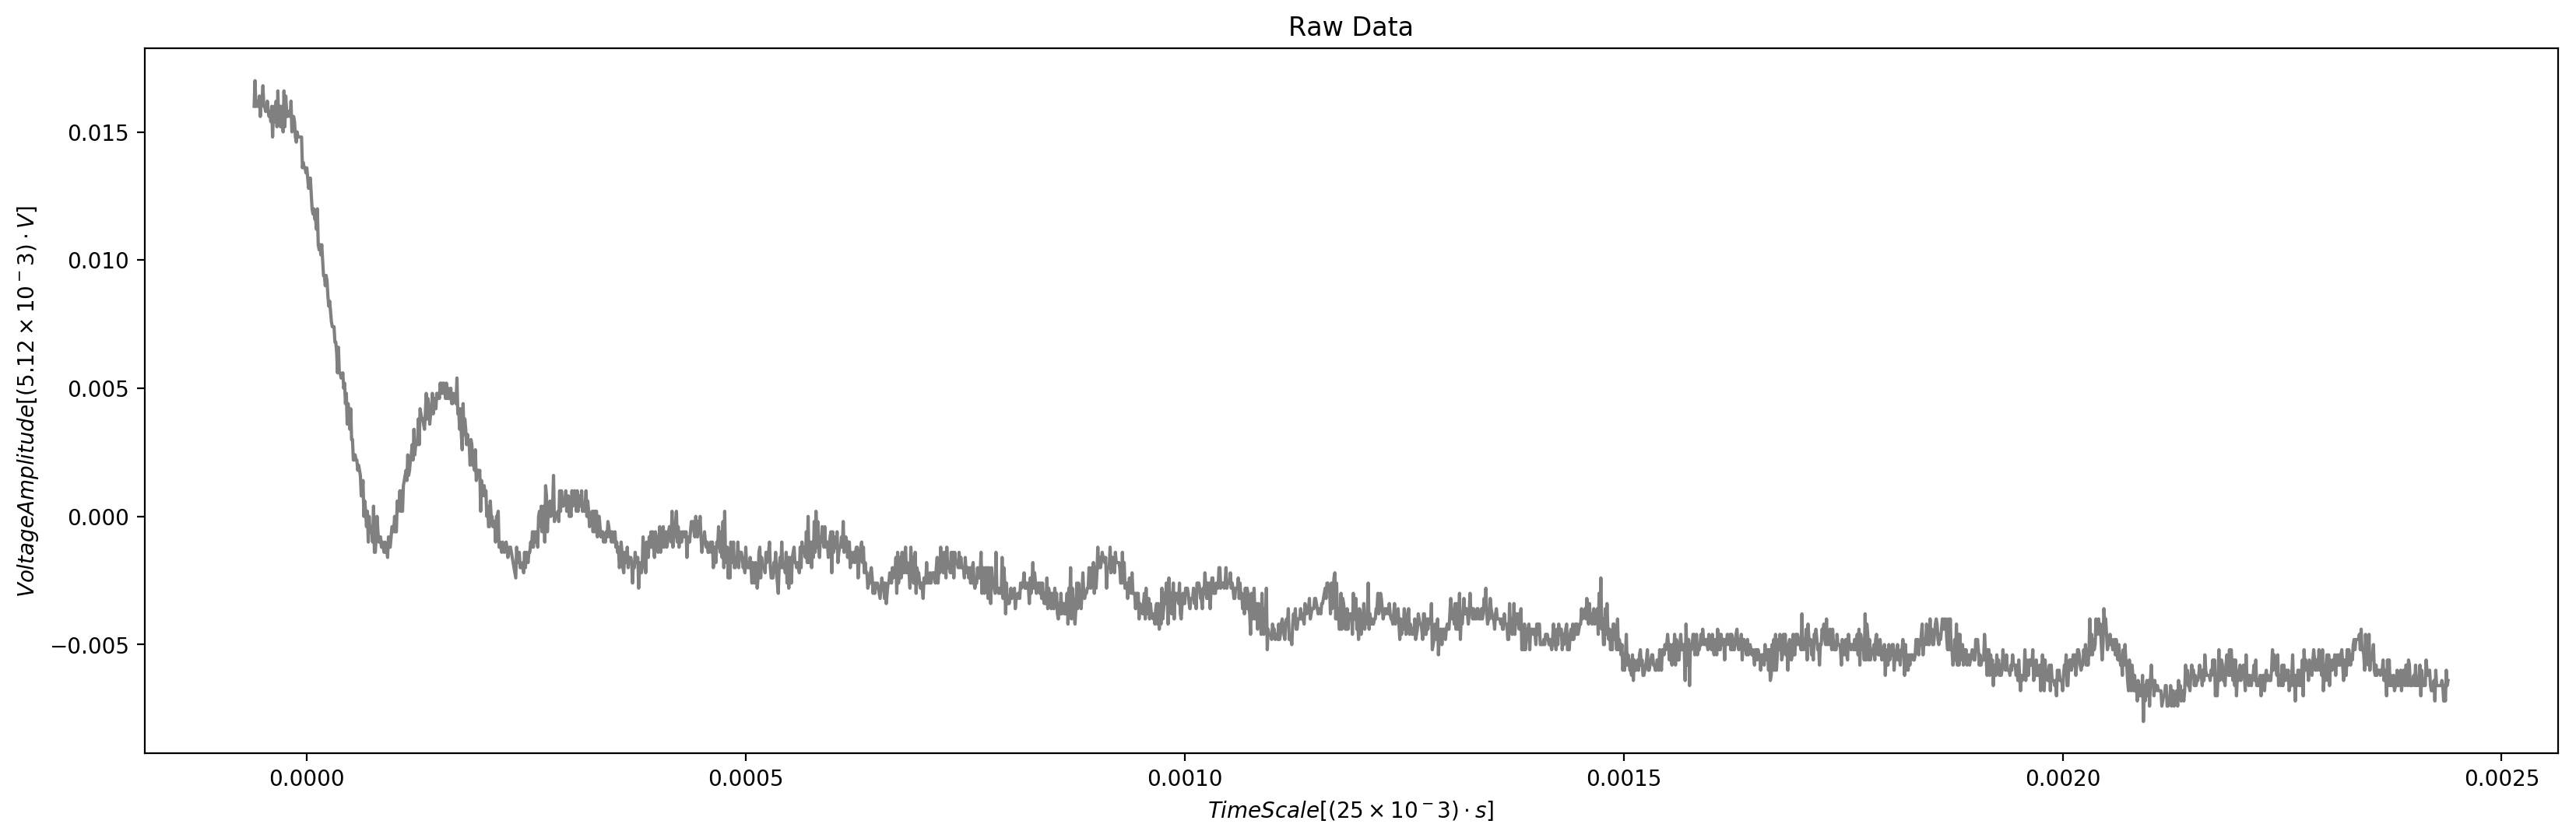

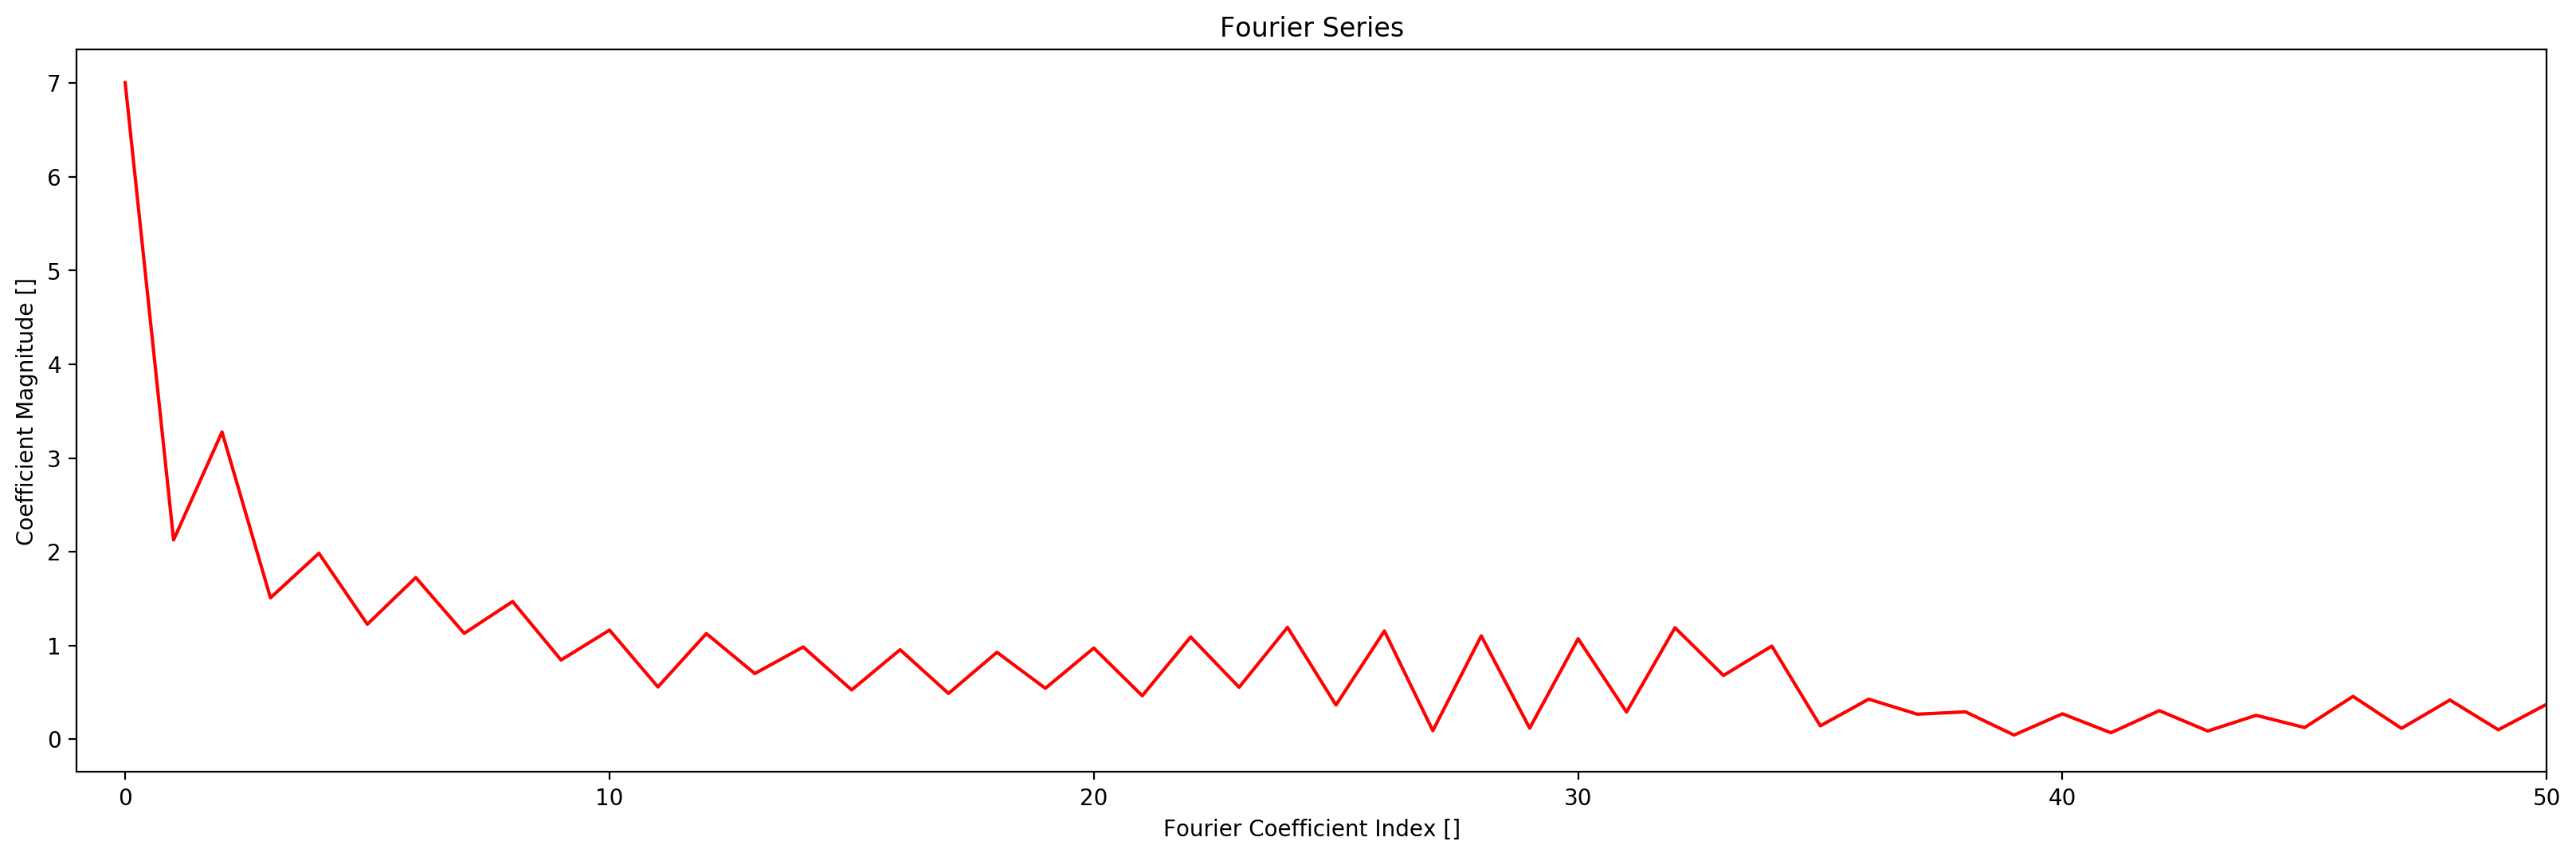

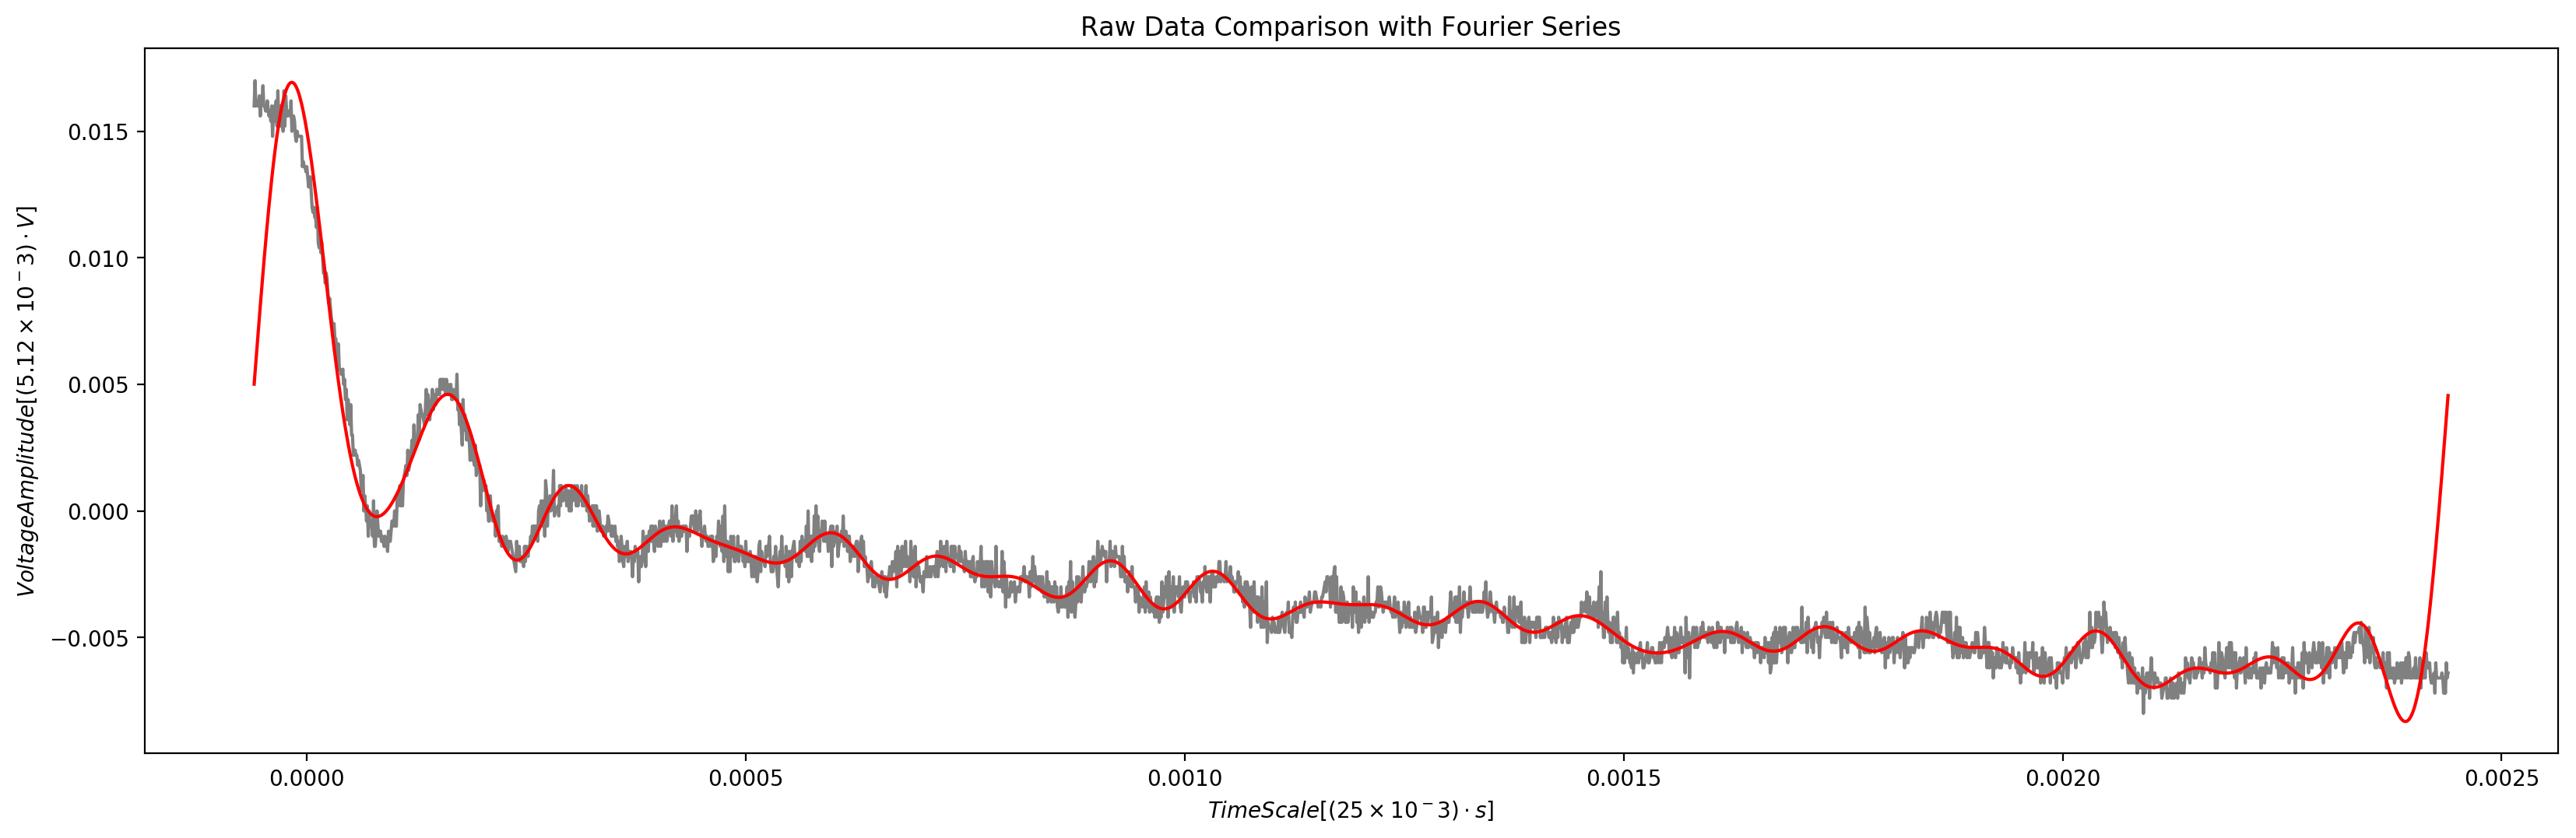

opening : Rabi\Csvs\-1.05A\506kHz.csv


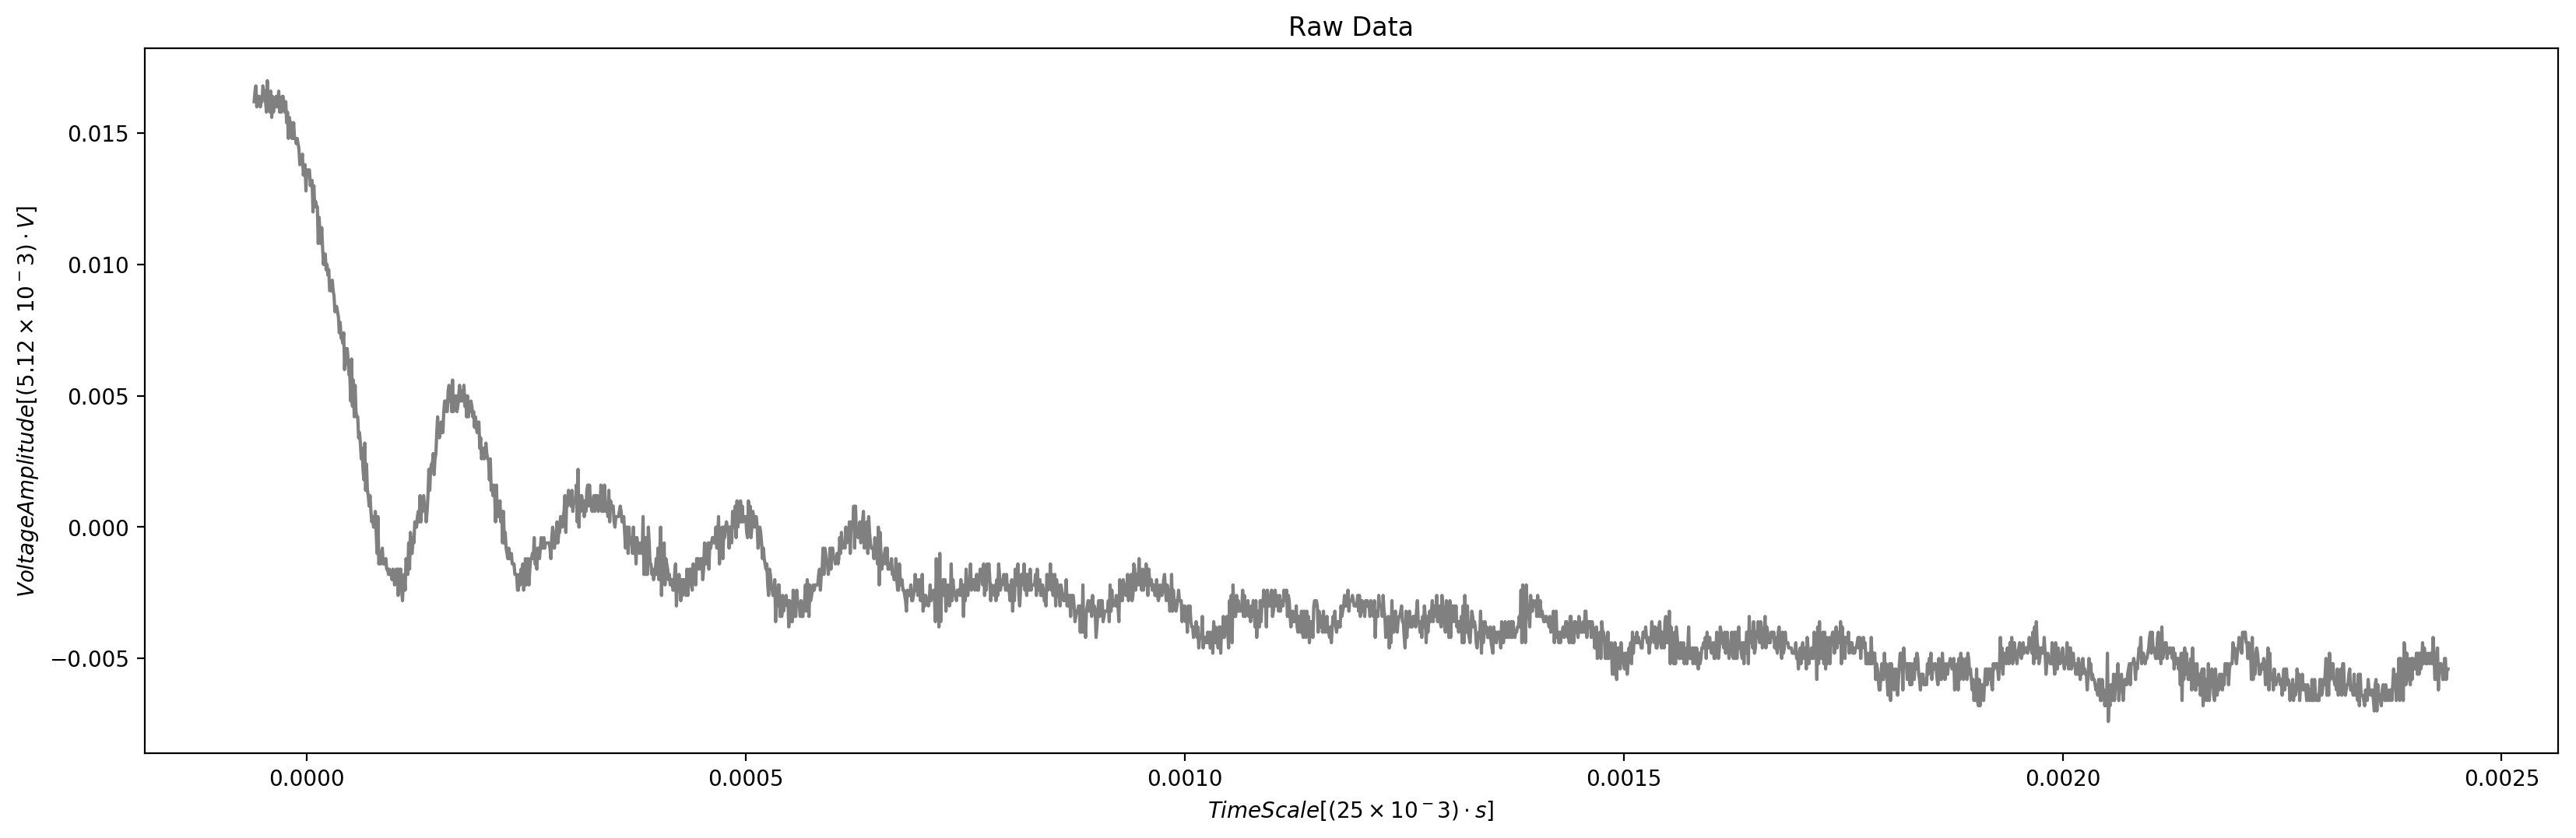

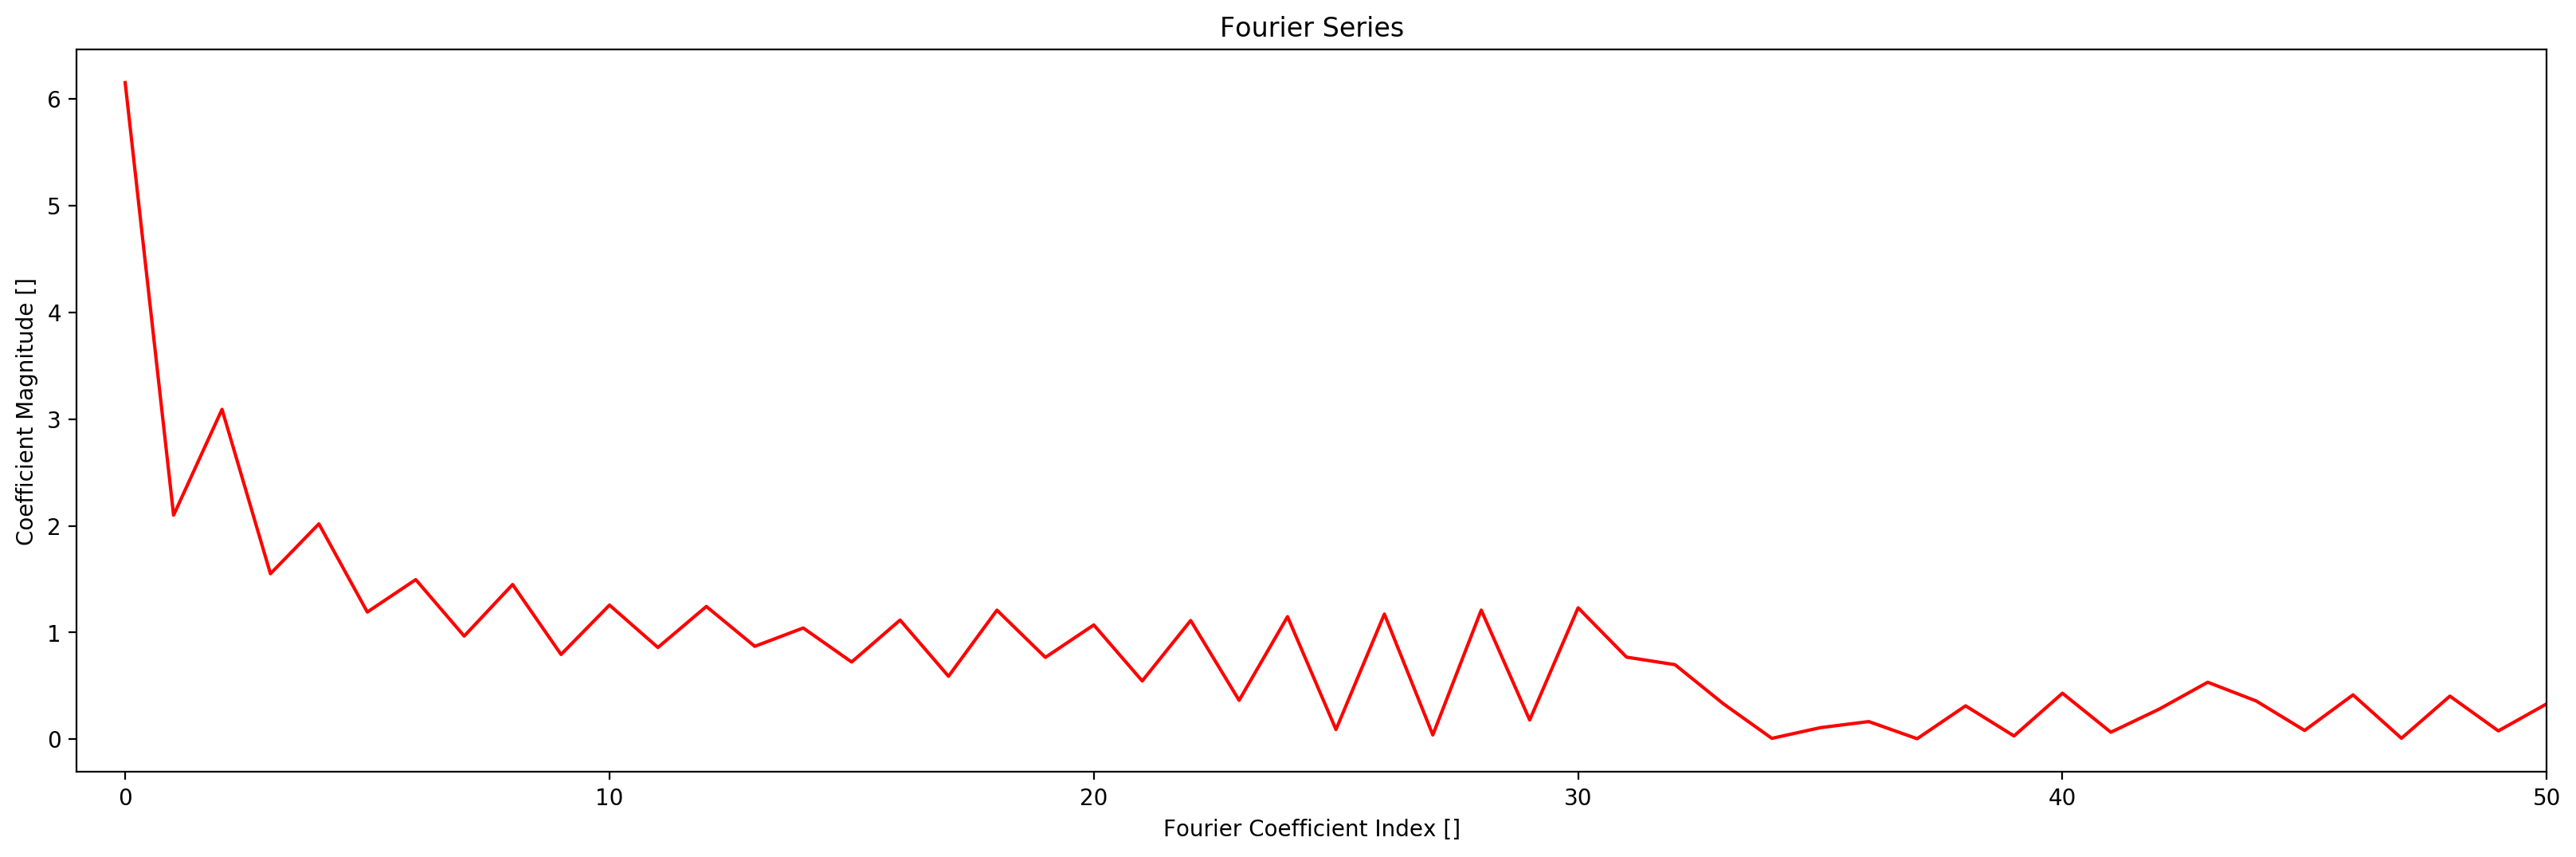

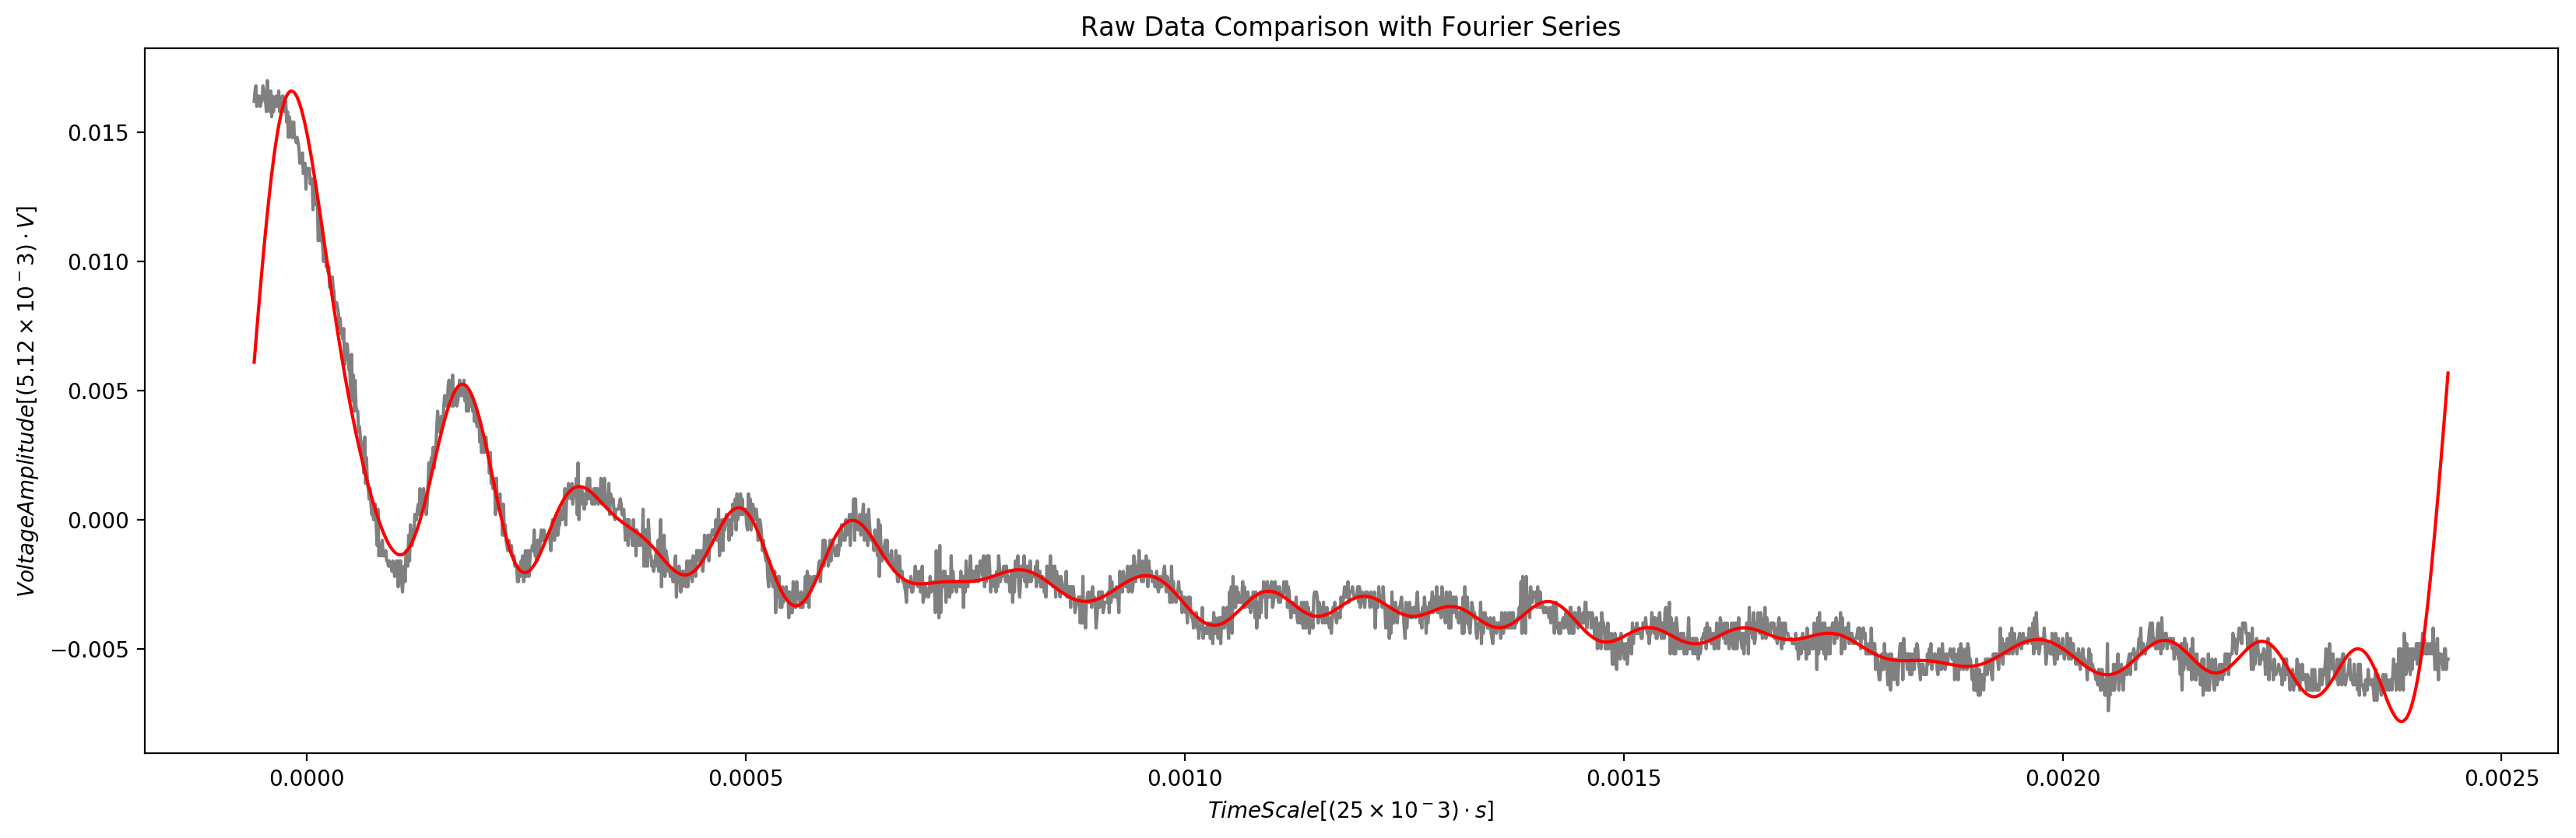

opening : Rabi\Csvs\-1.05A\507kHz.csv


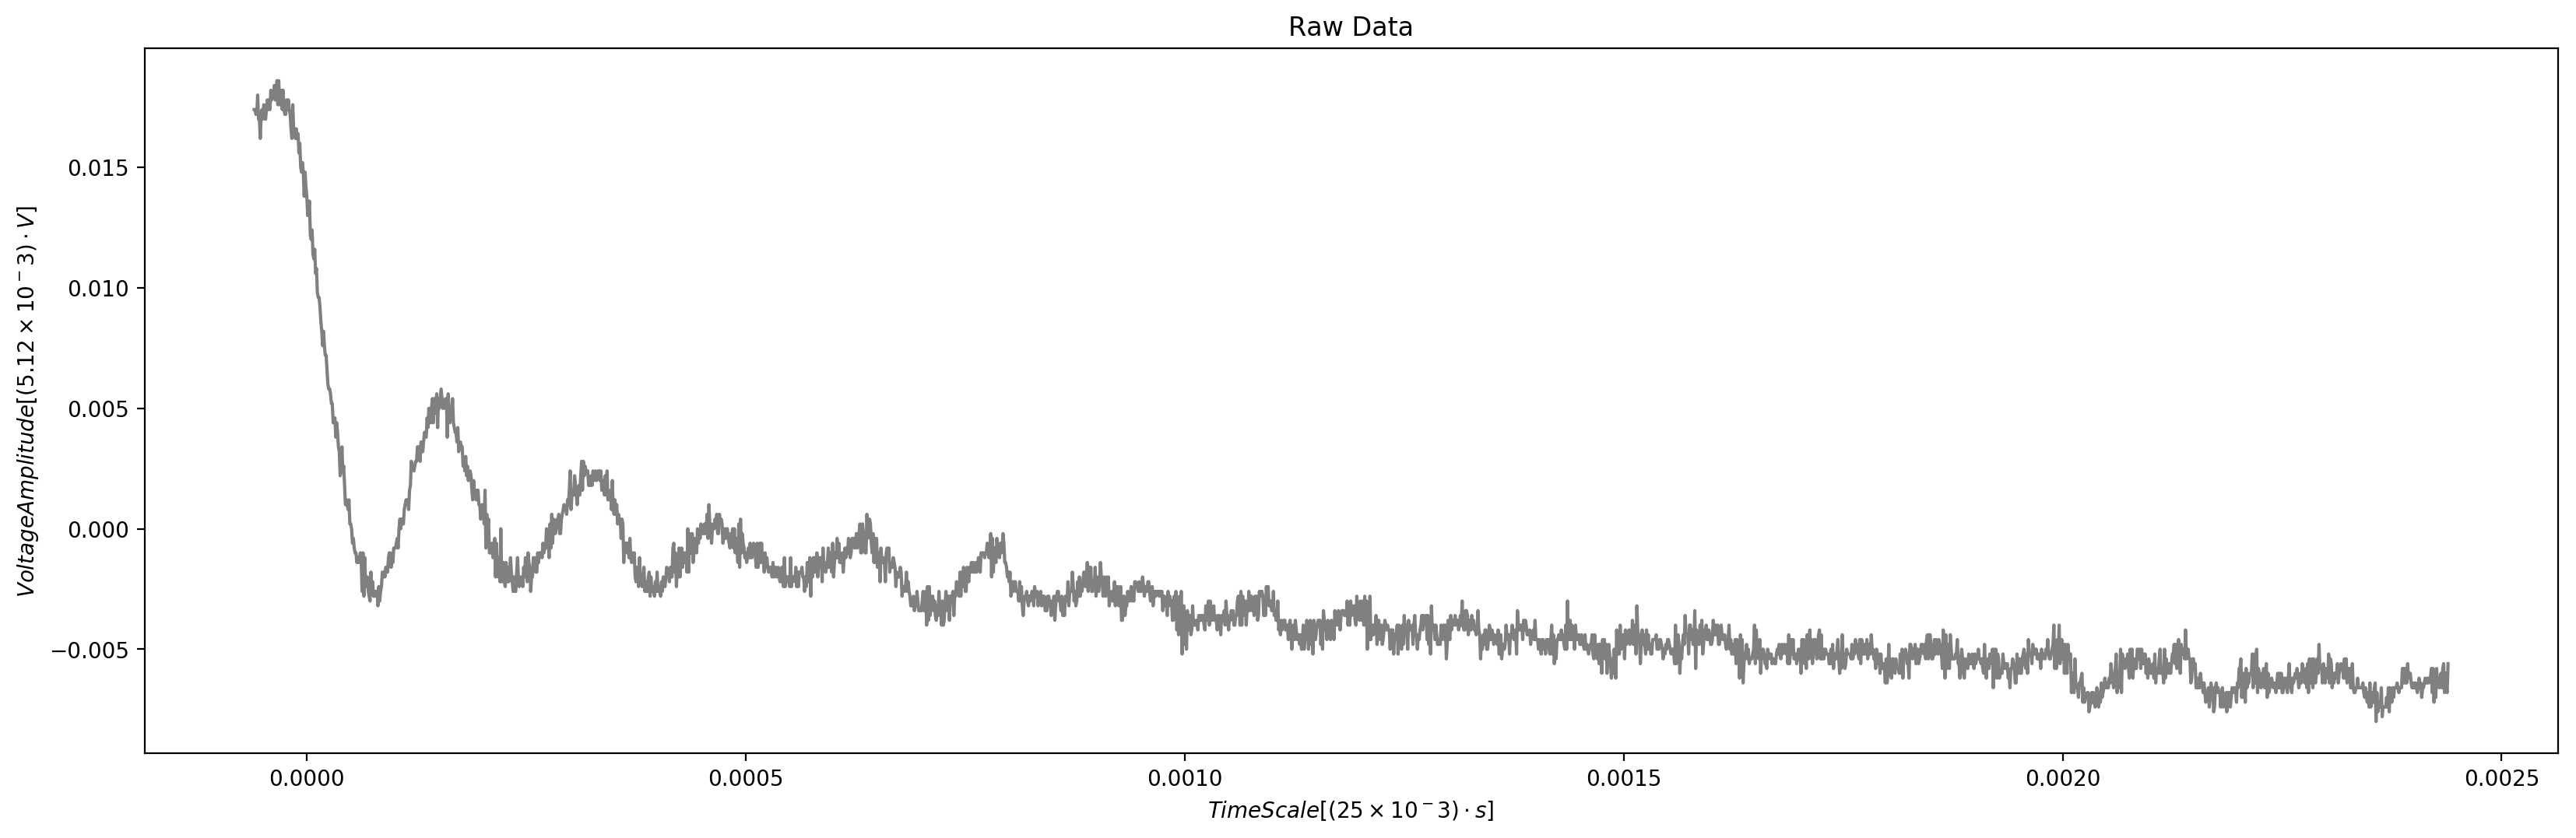

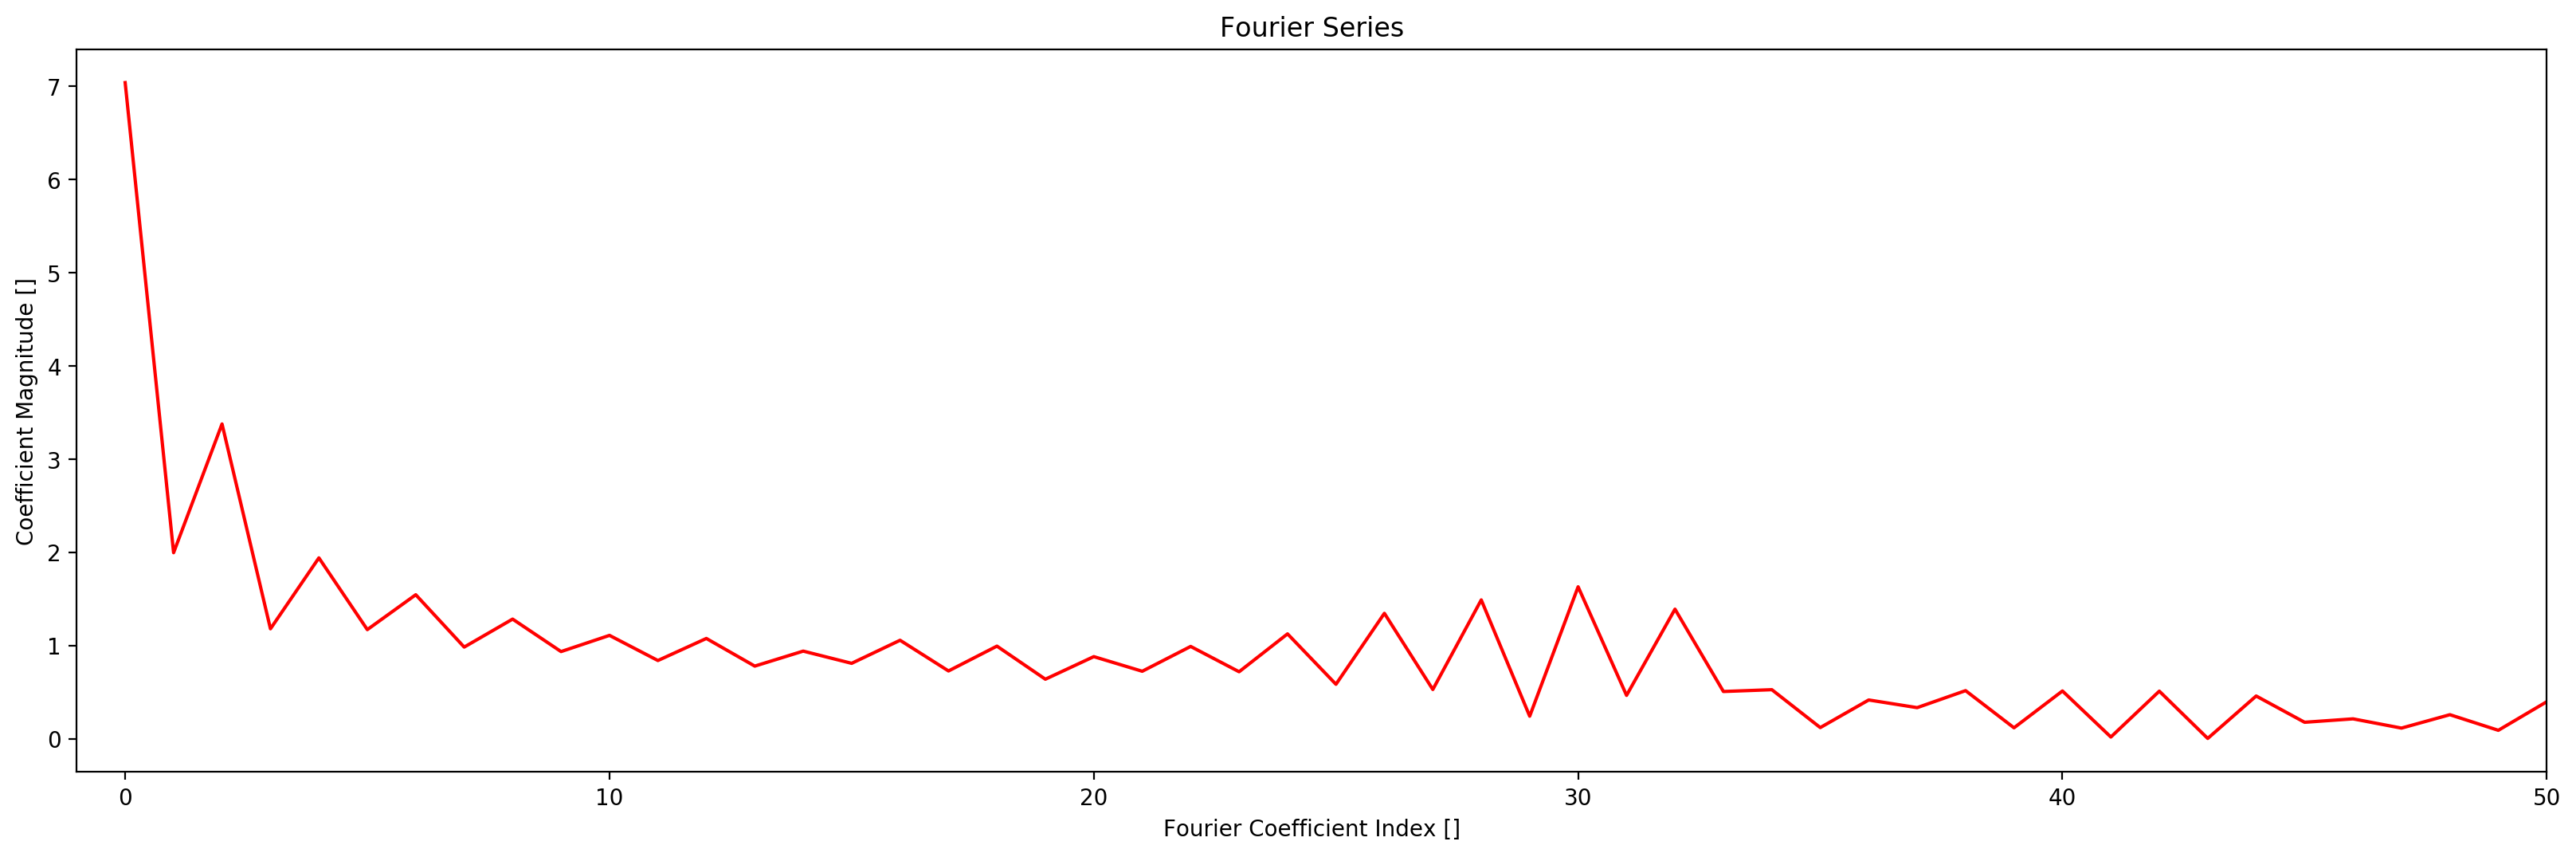

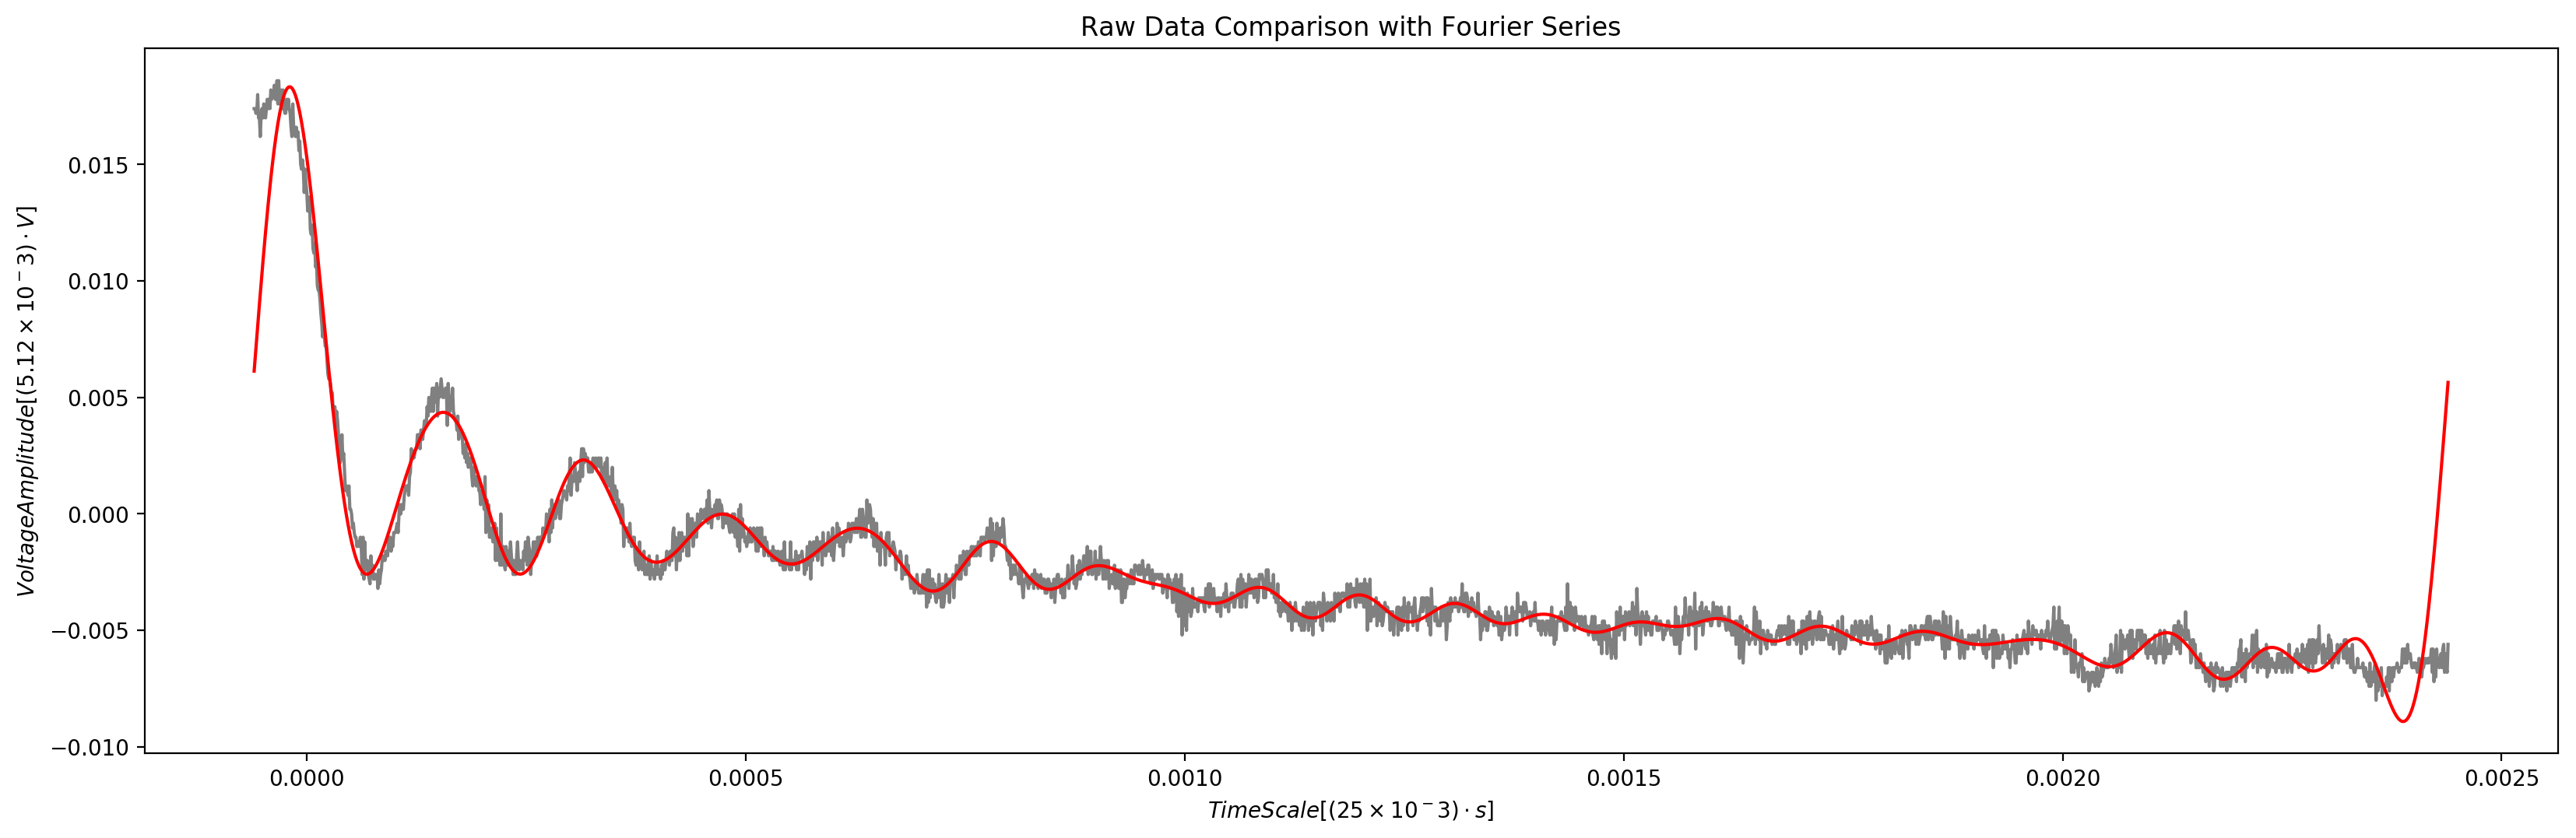

opening : Rabi\Csvs\-1.05A\508kHz.csv


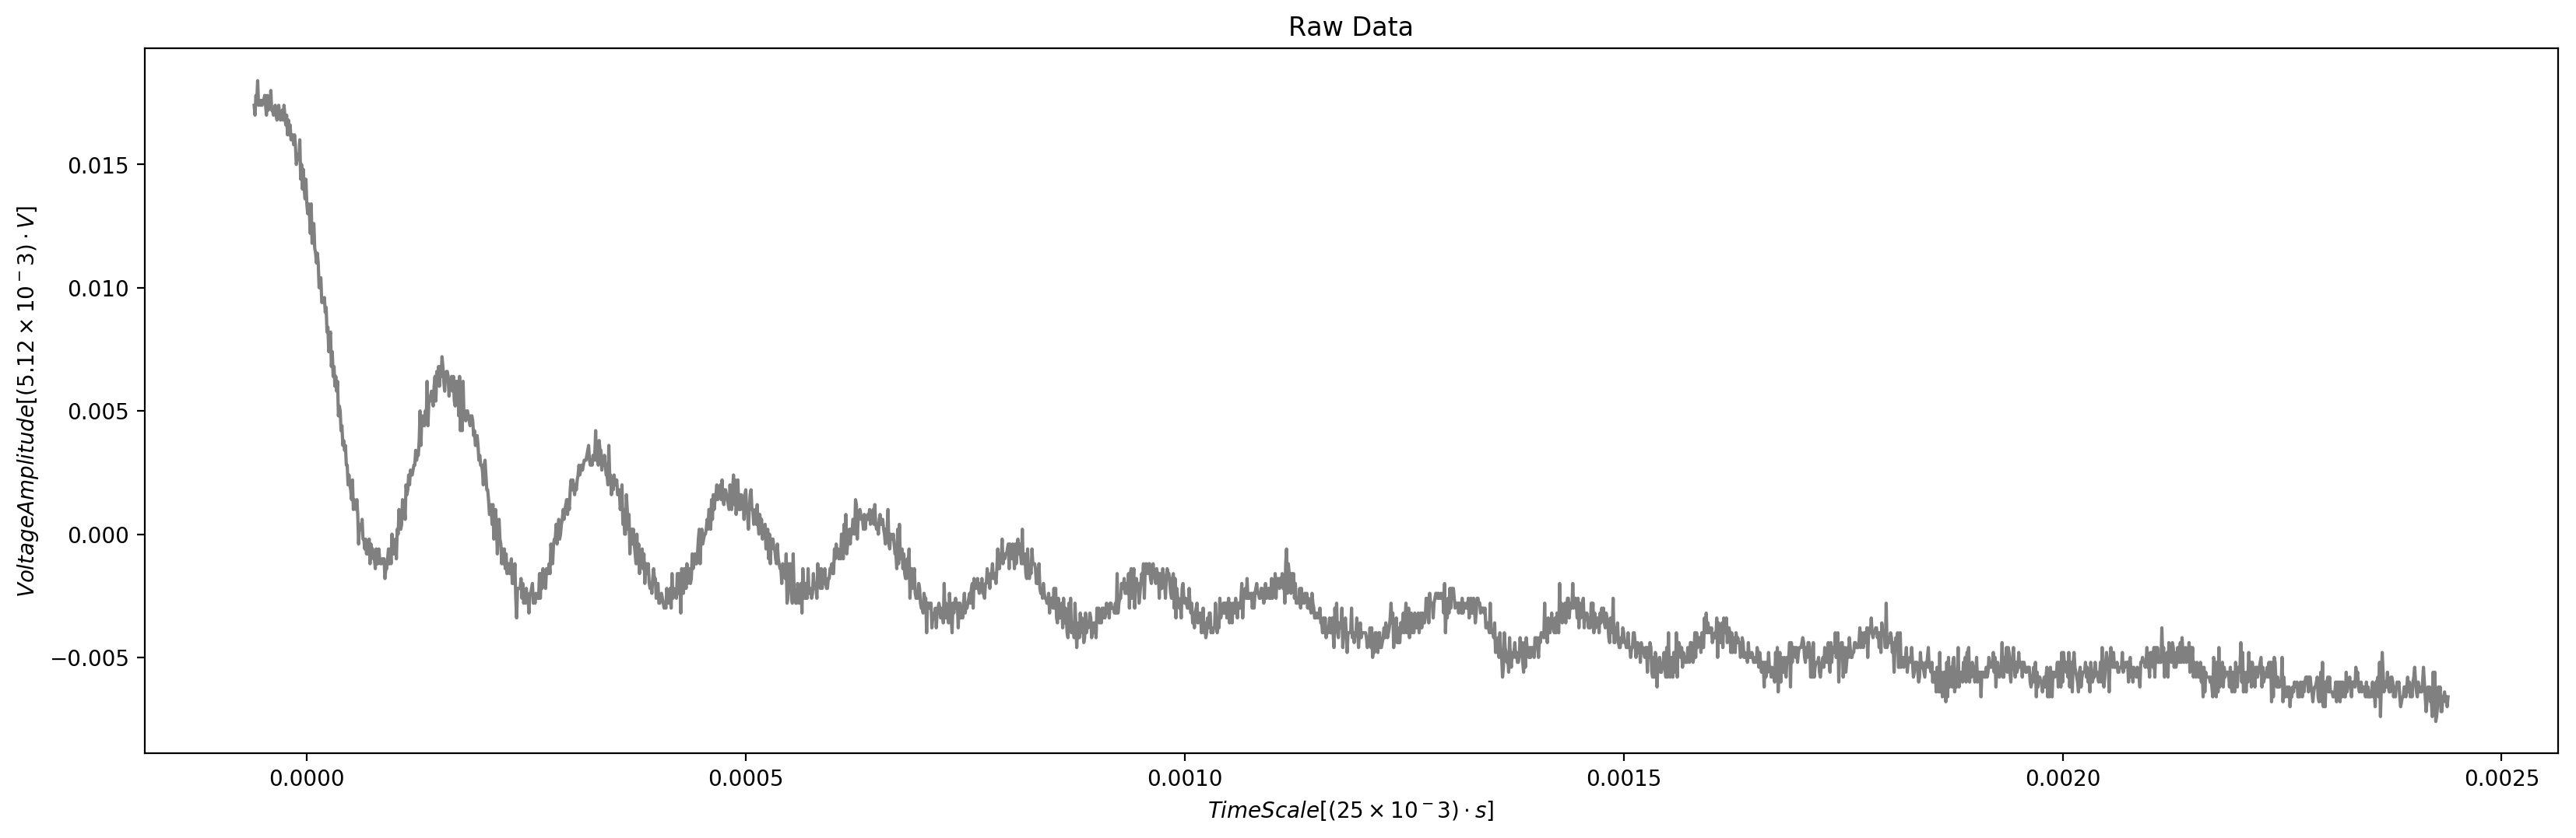

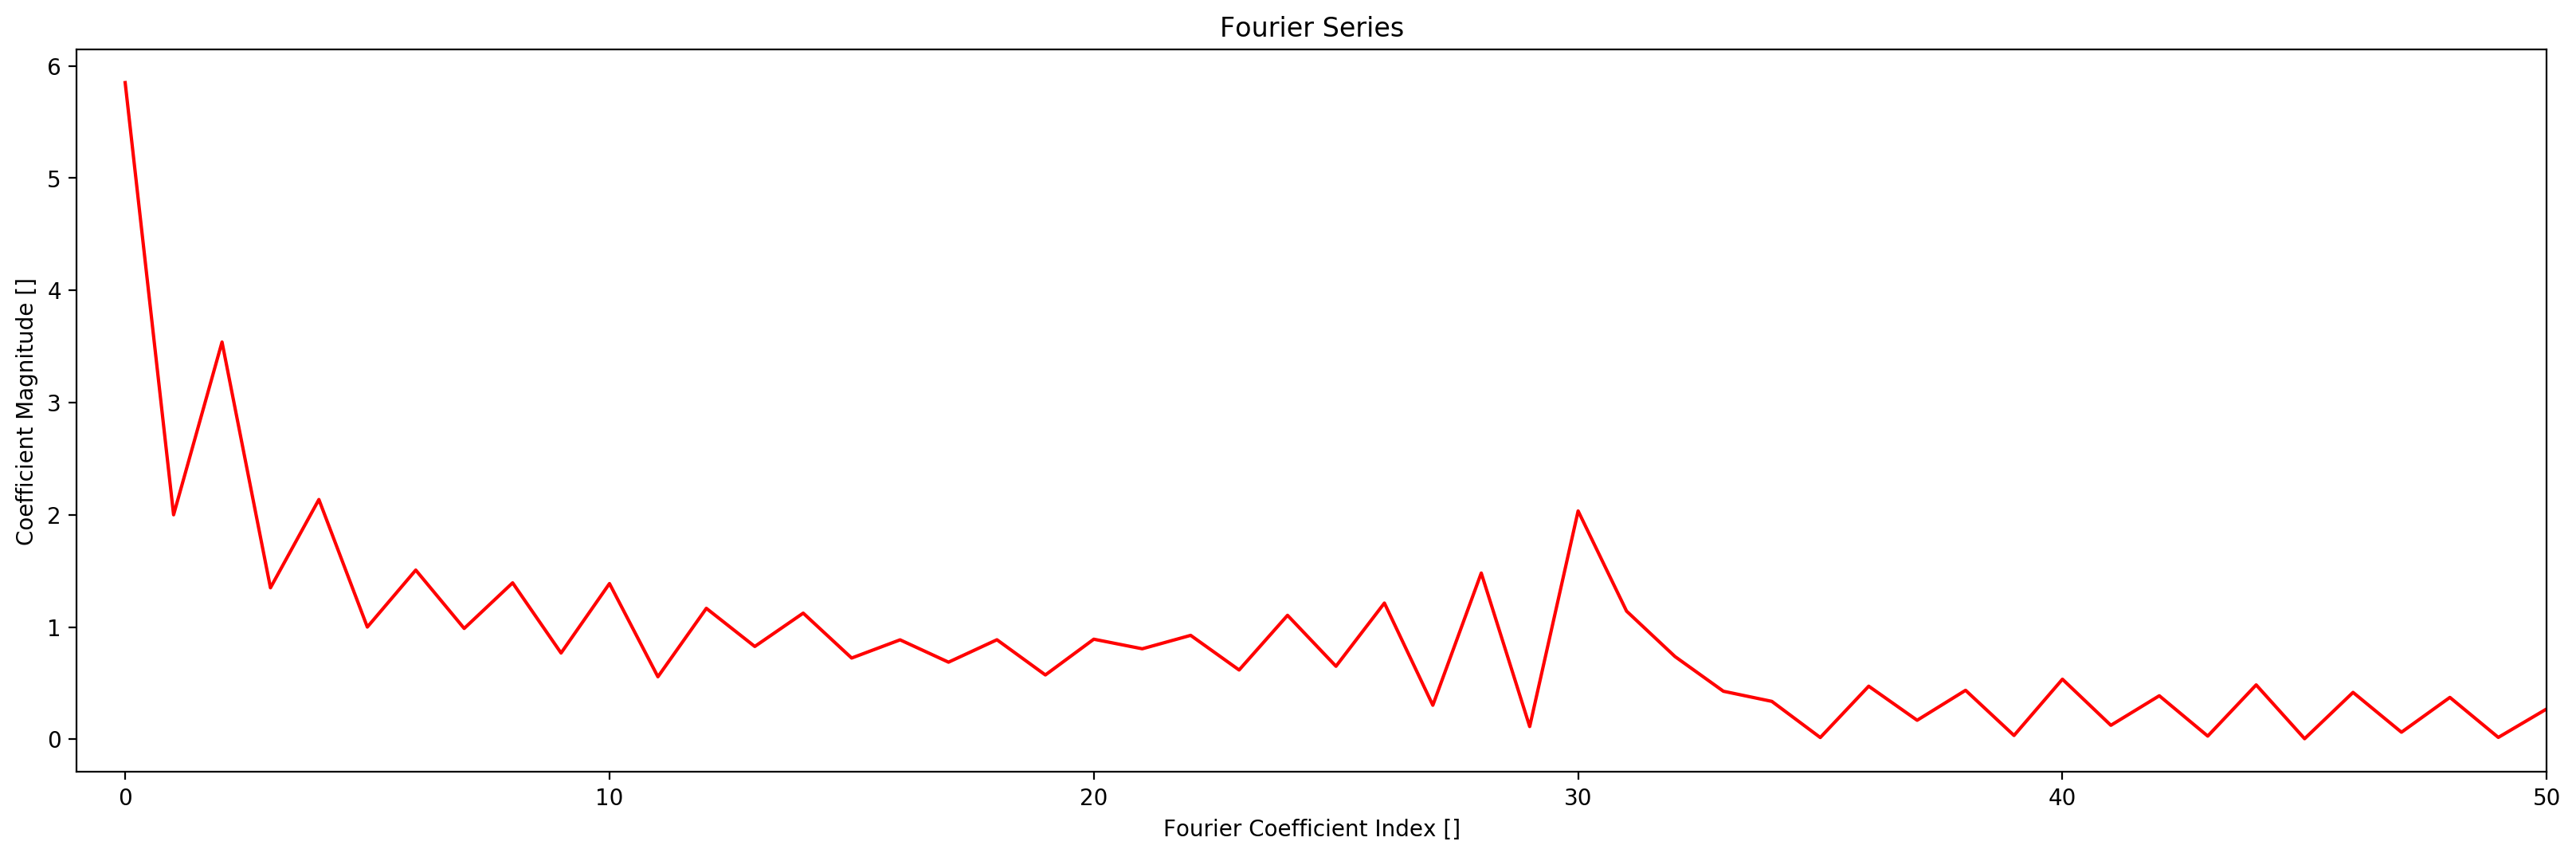

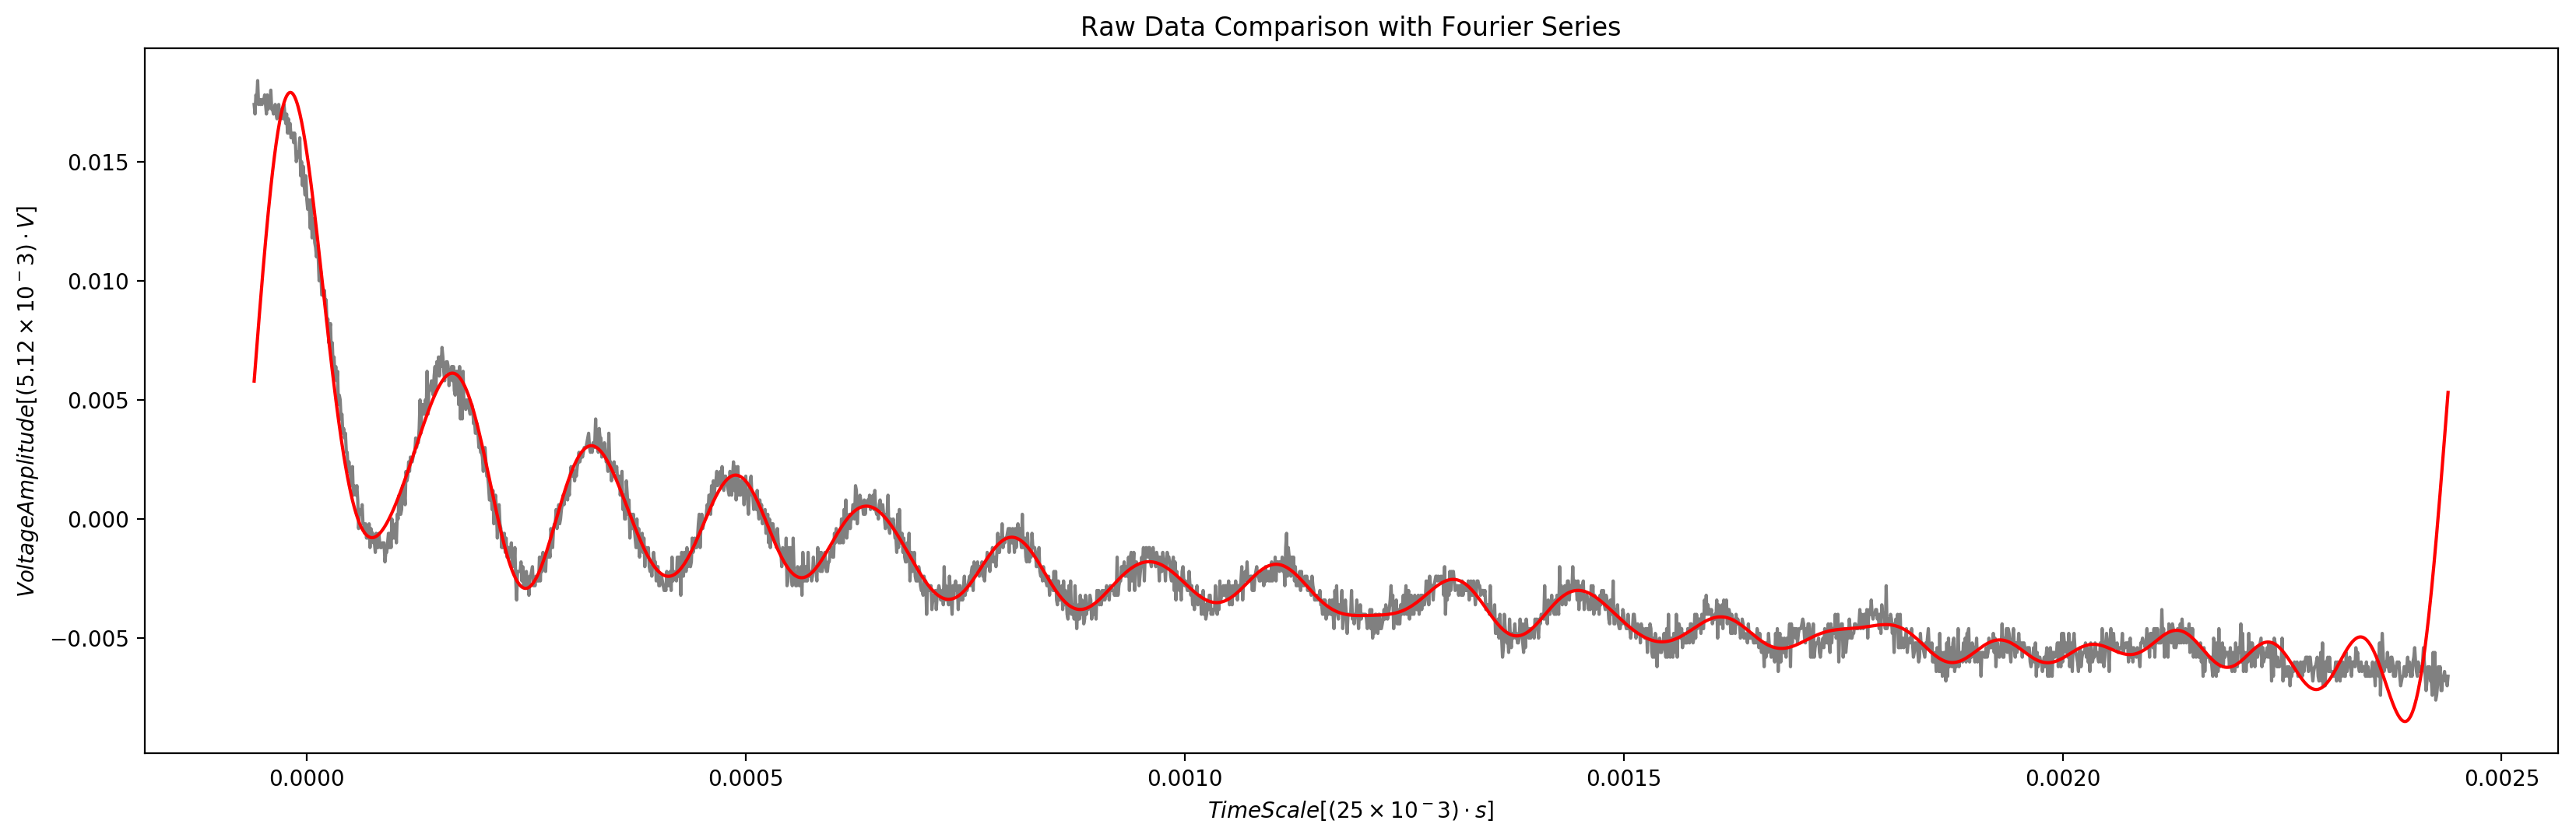

opening : Rabi\Csvs\-1.05A\509kHz.csv


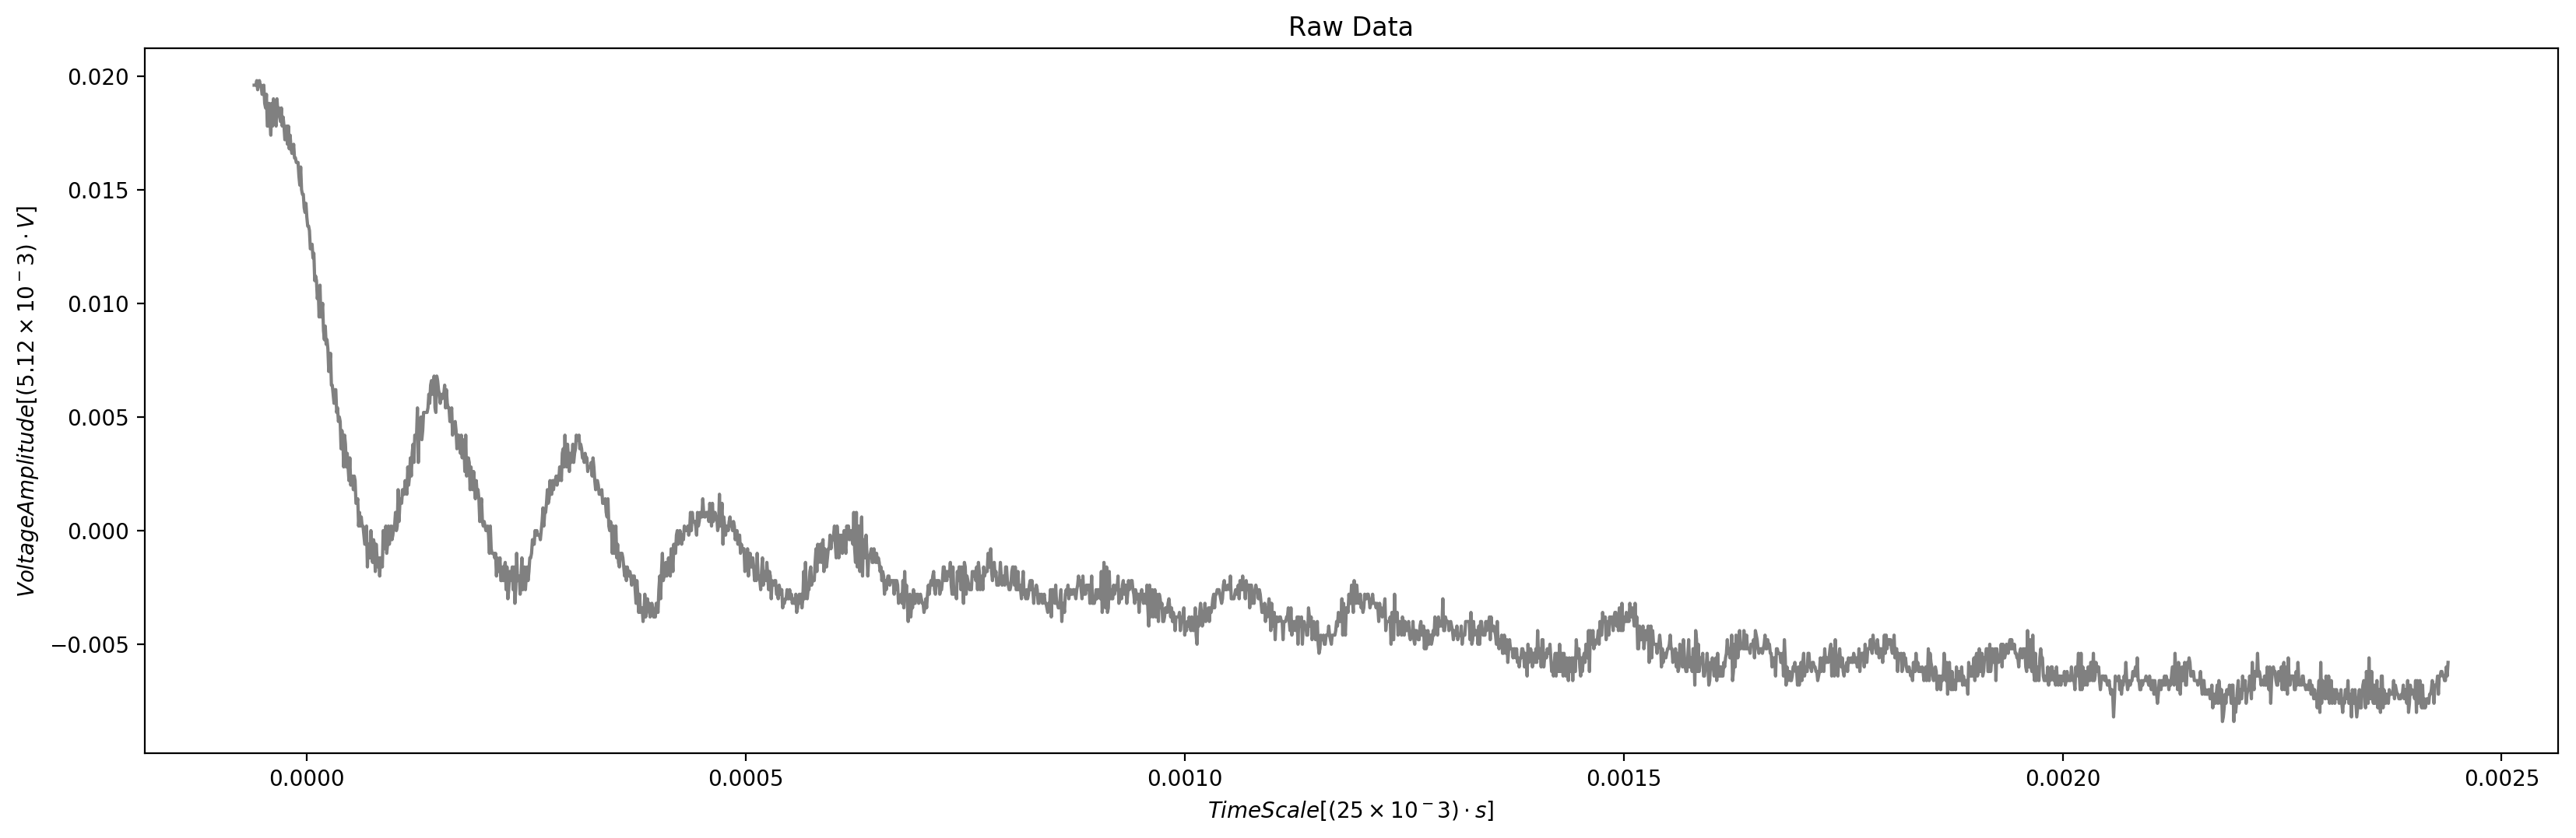

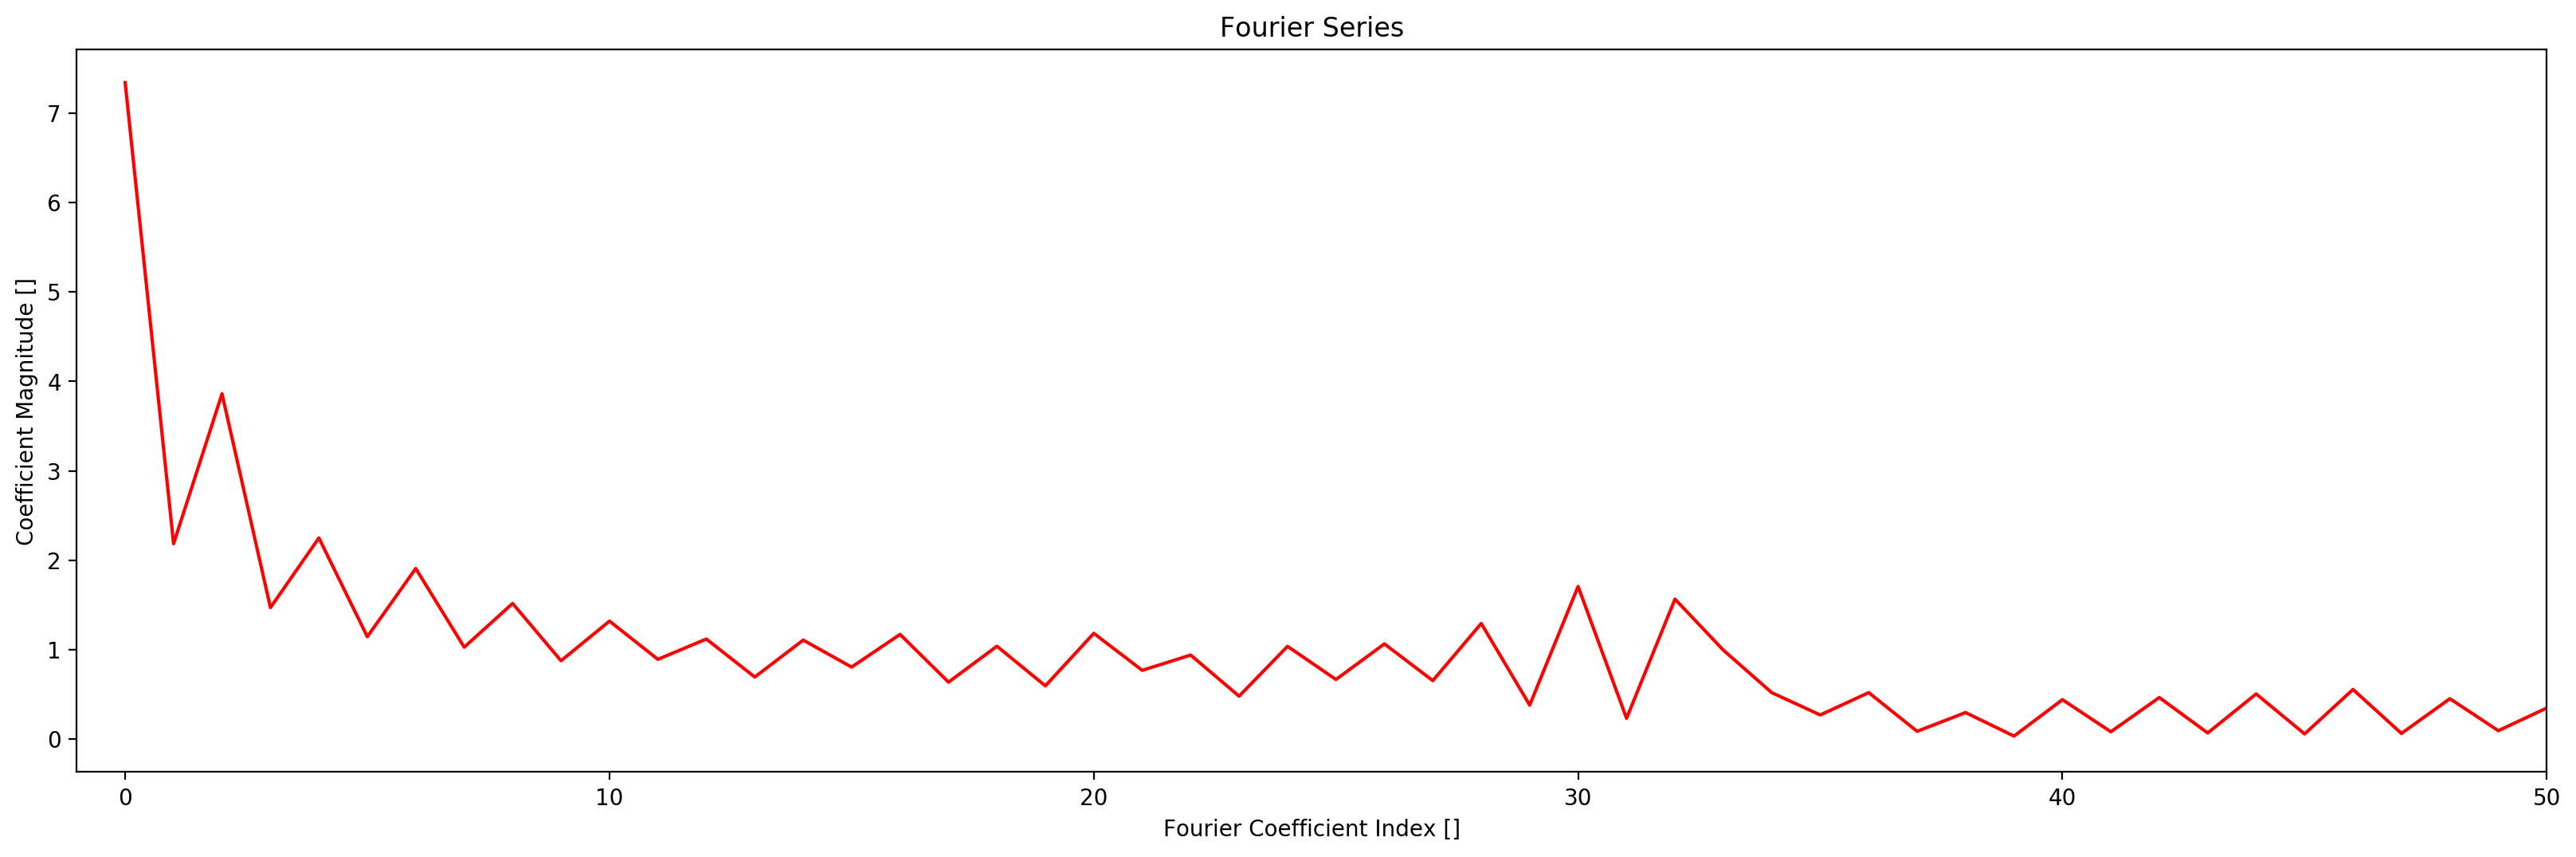

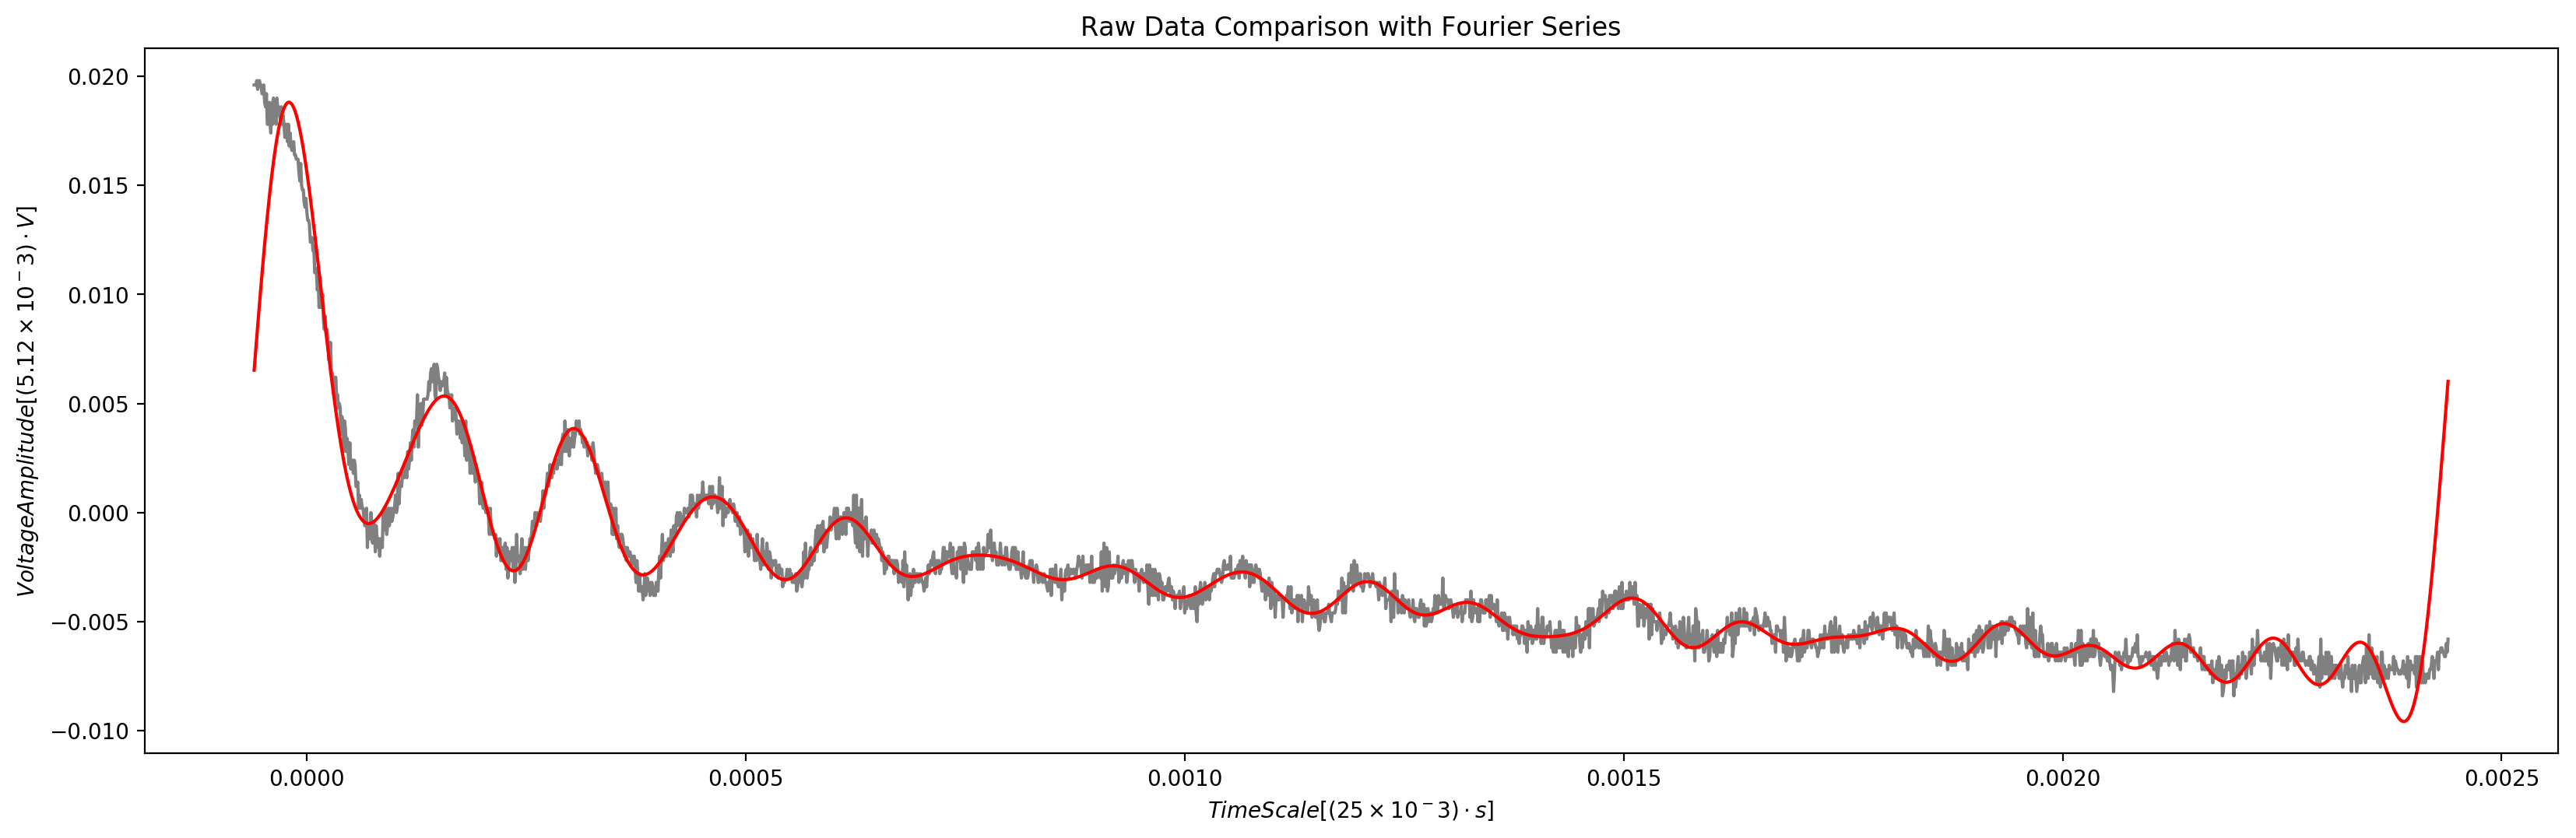

opening : Rabi\Csvs\-1.05A\510kHz.csv


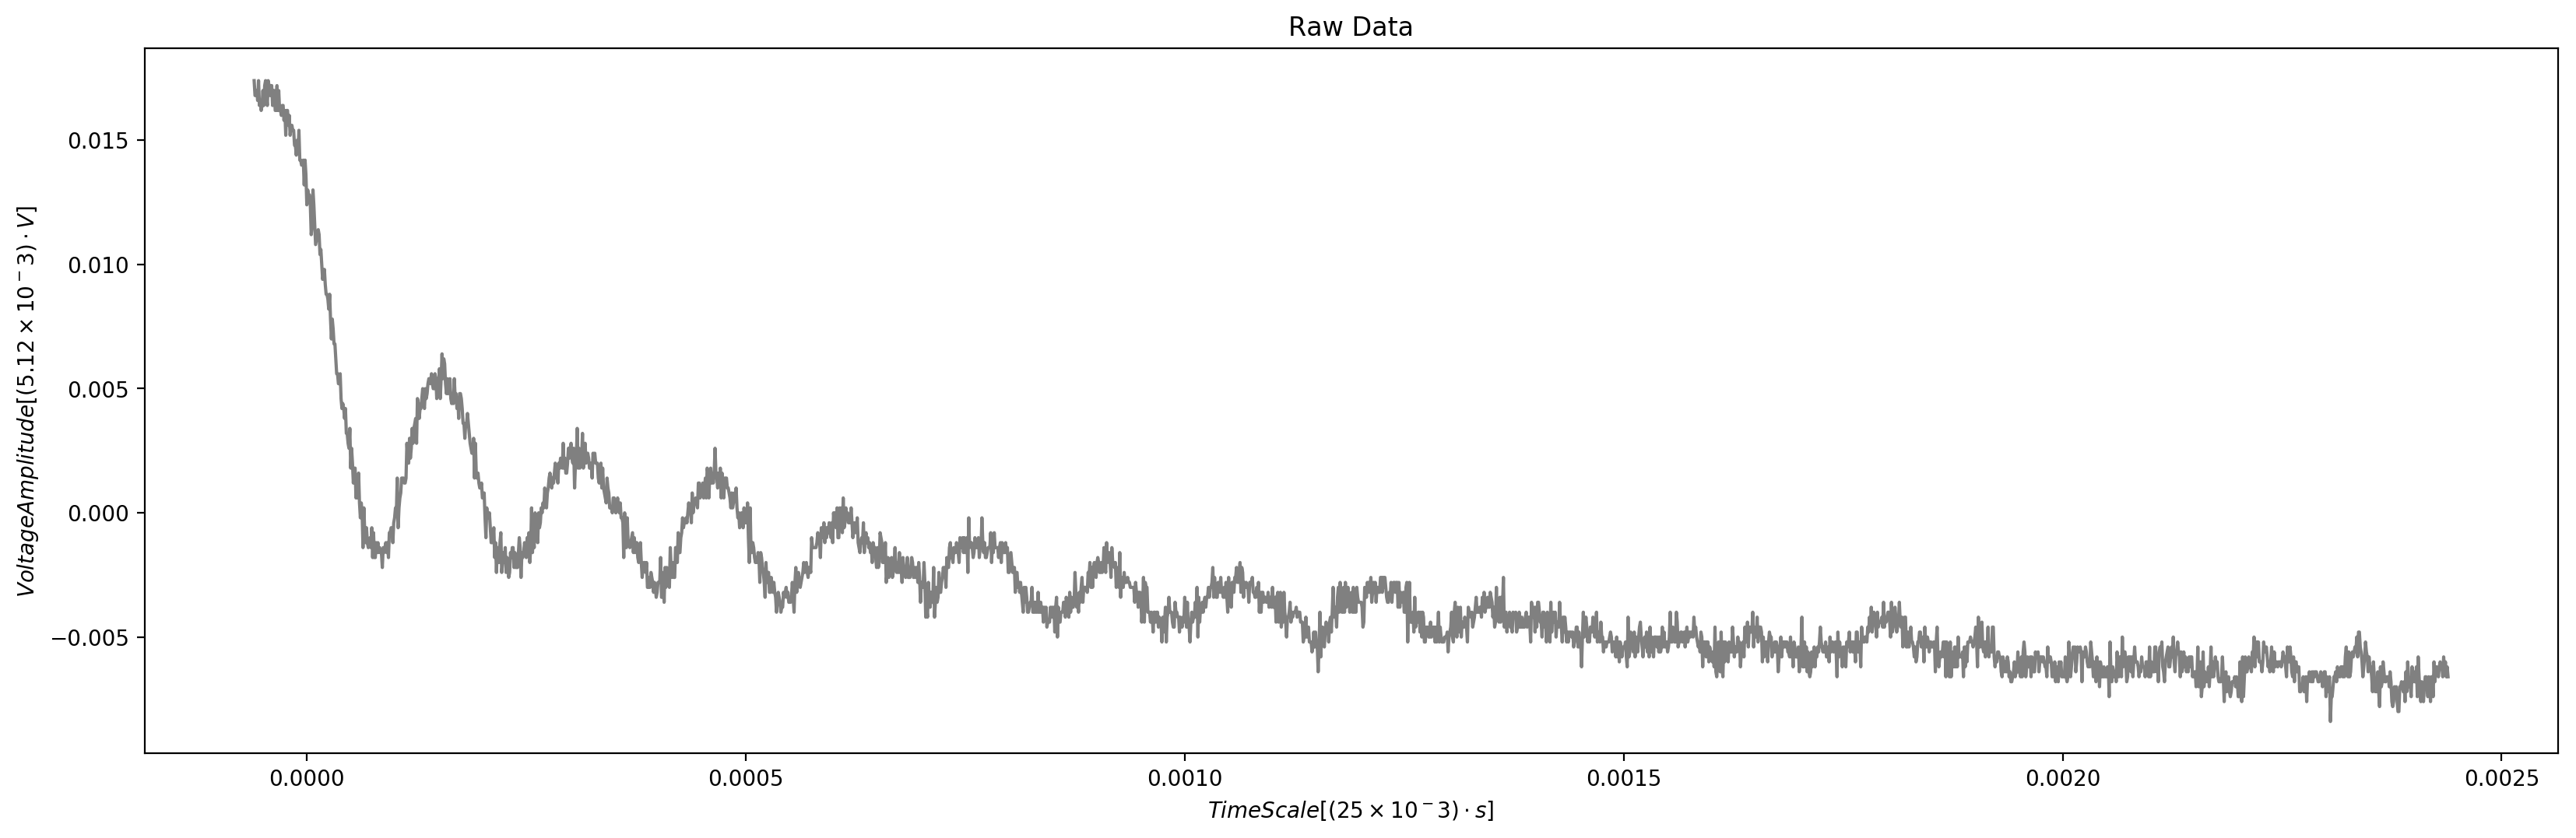

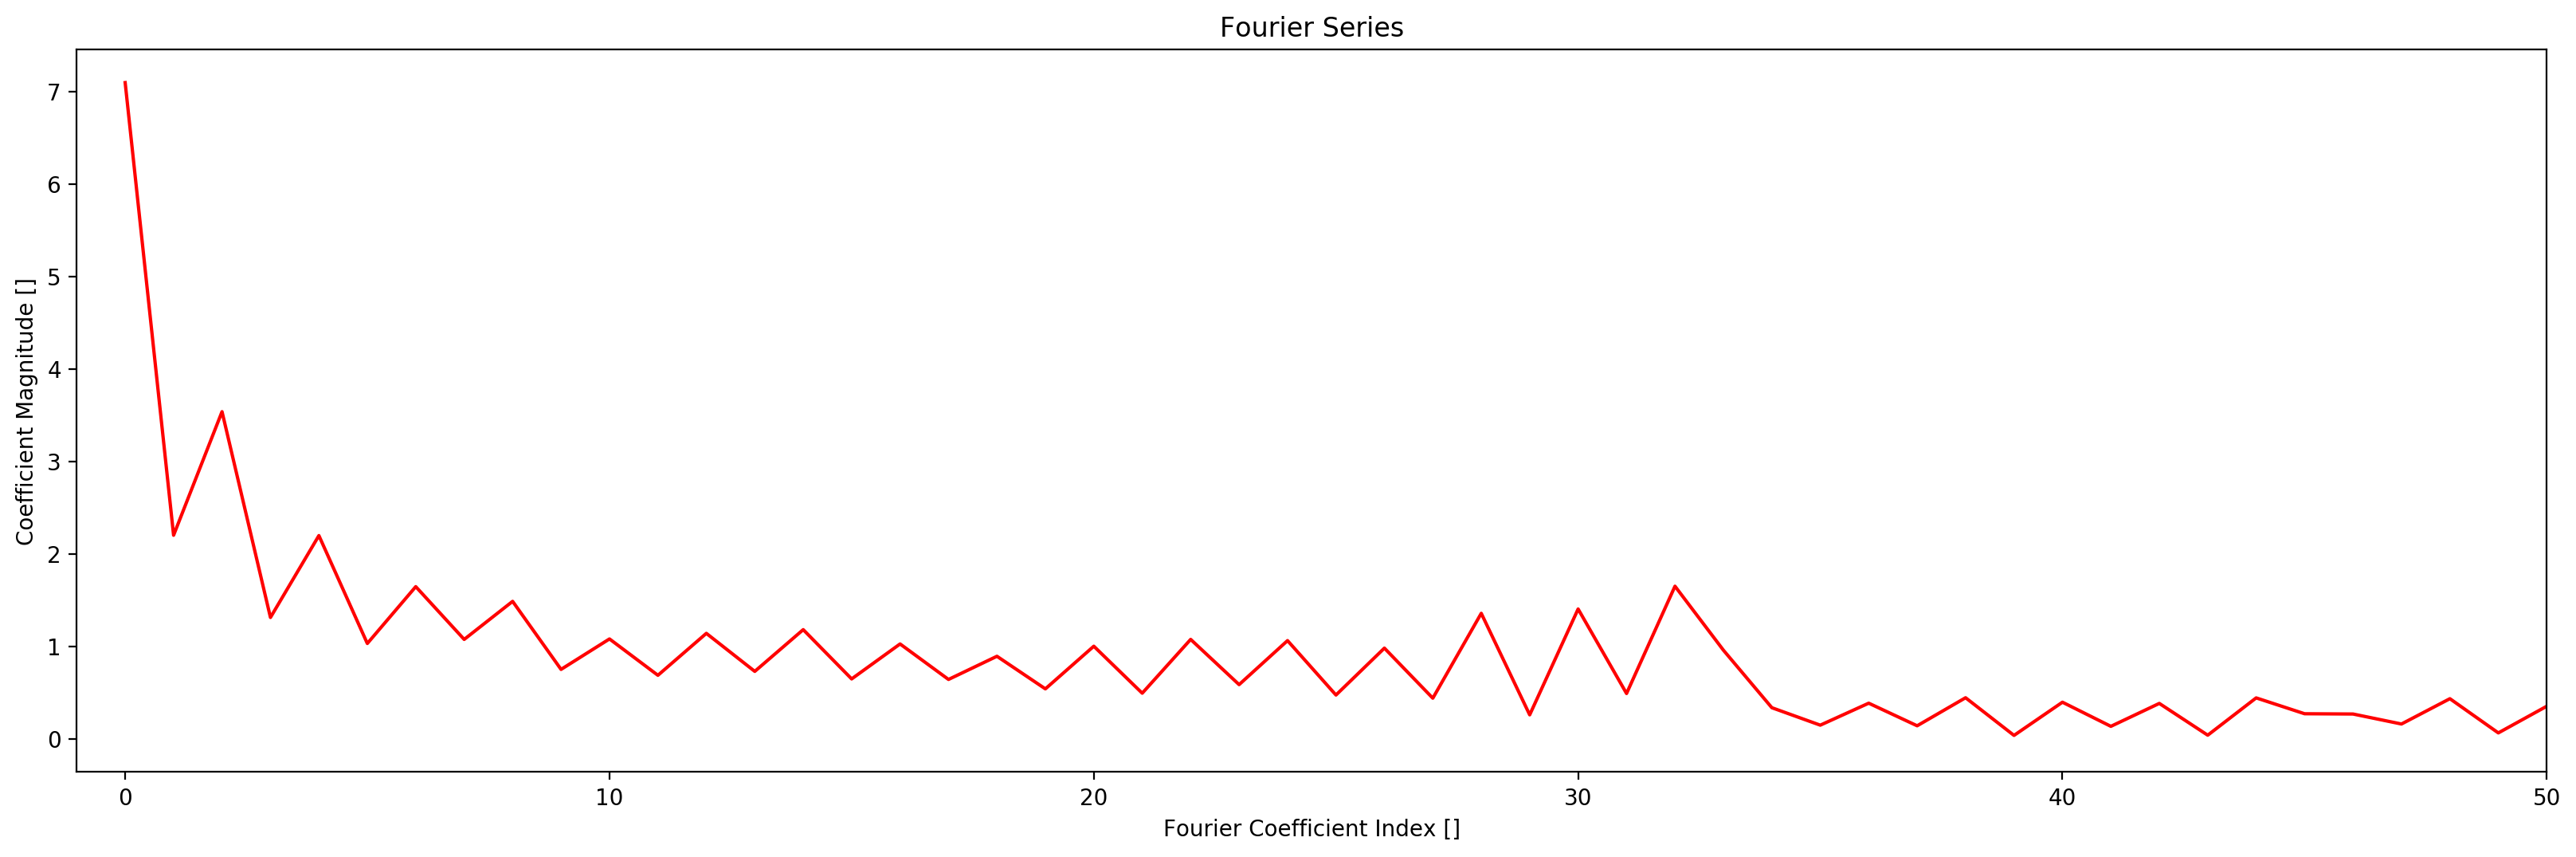

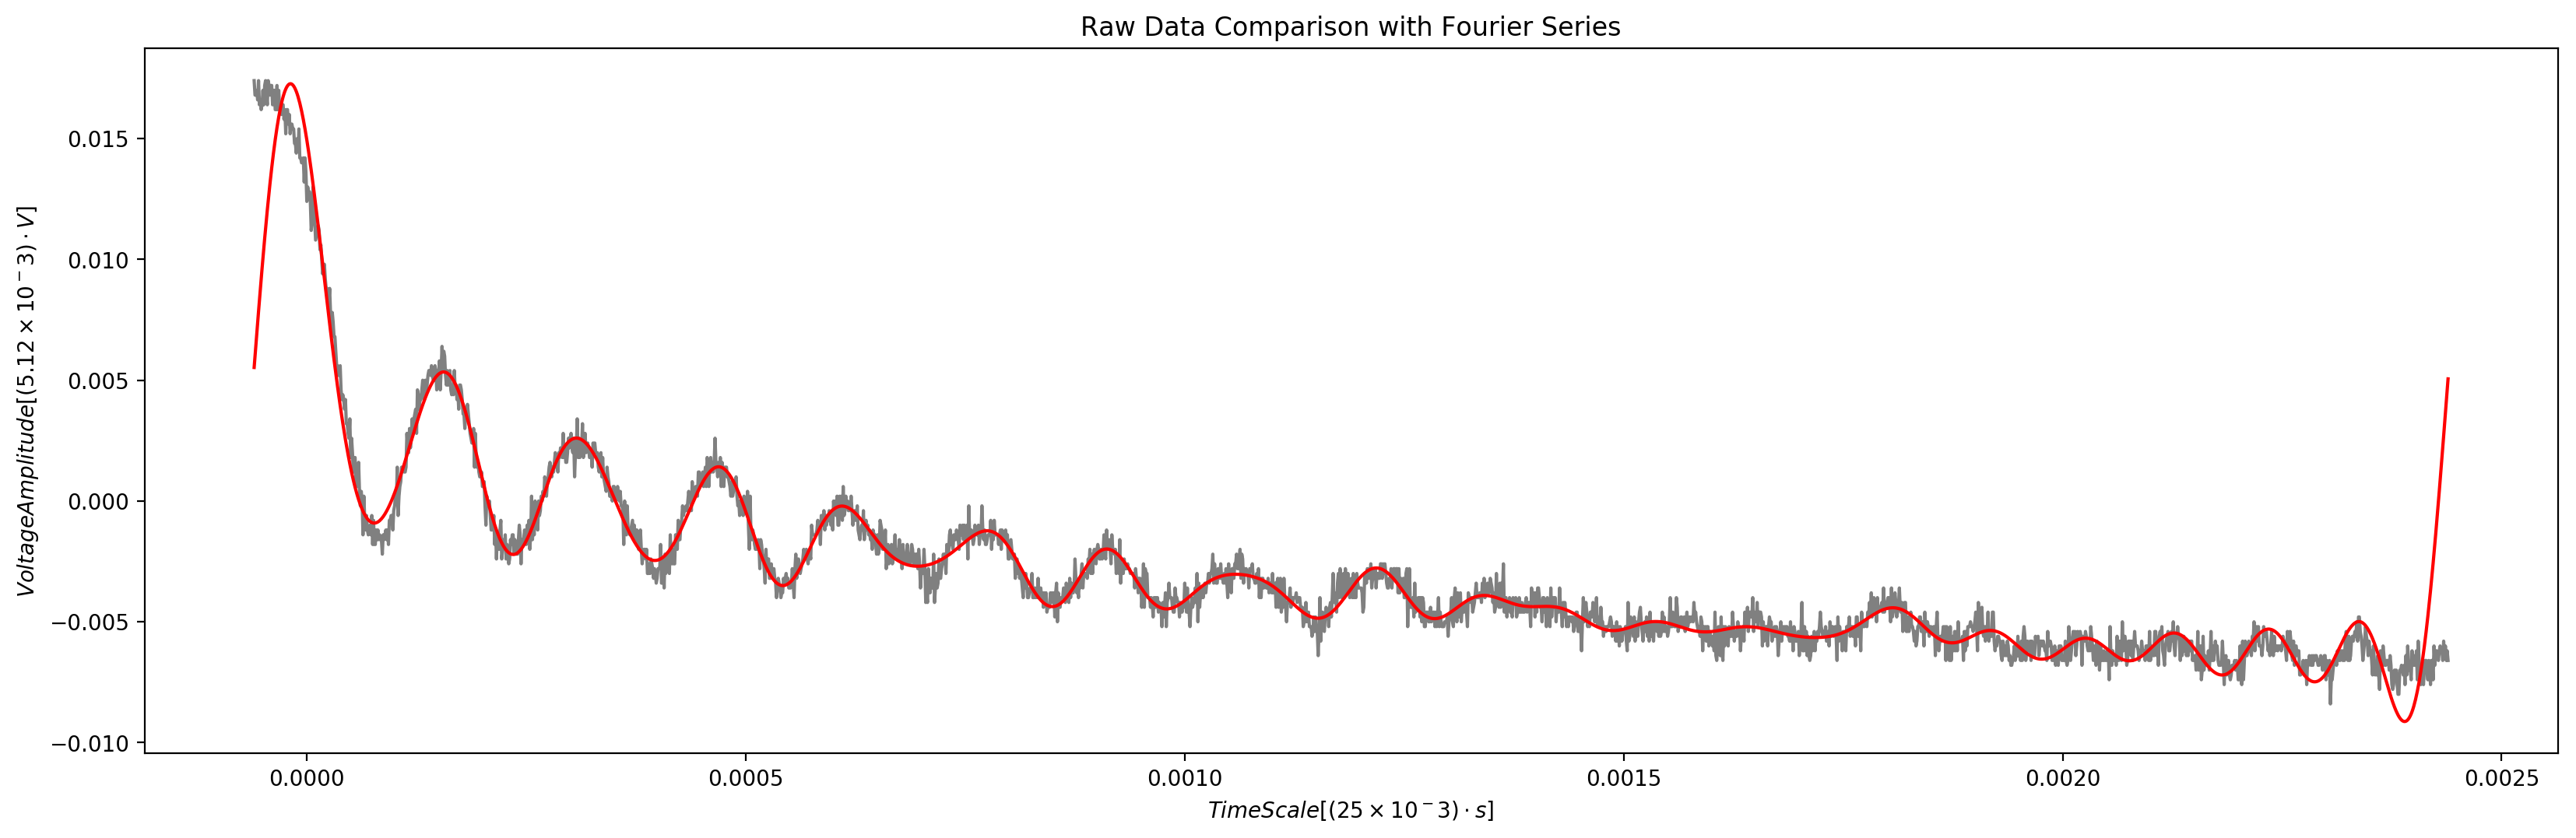

opening : Rabi\Csvs\-1.05A\511kHz.csv


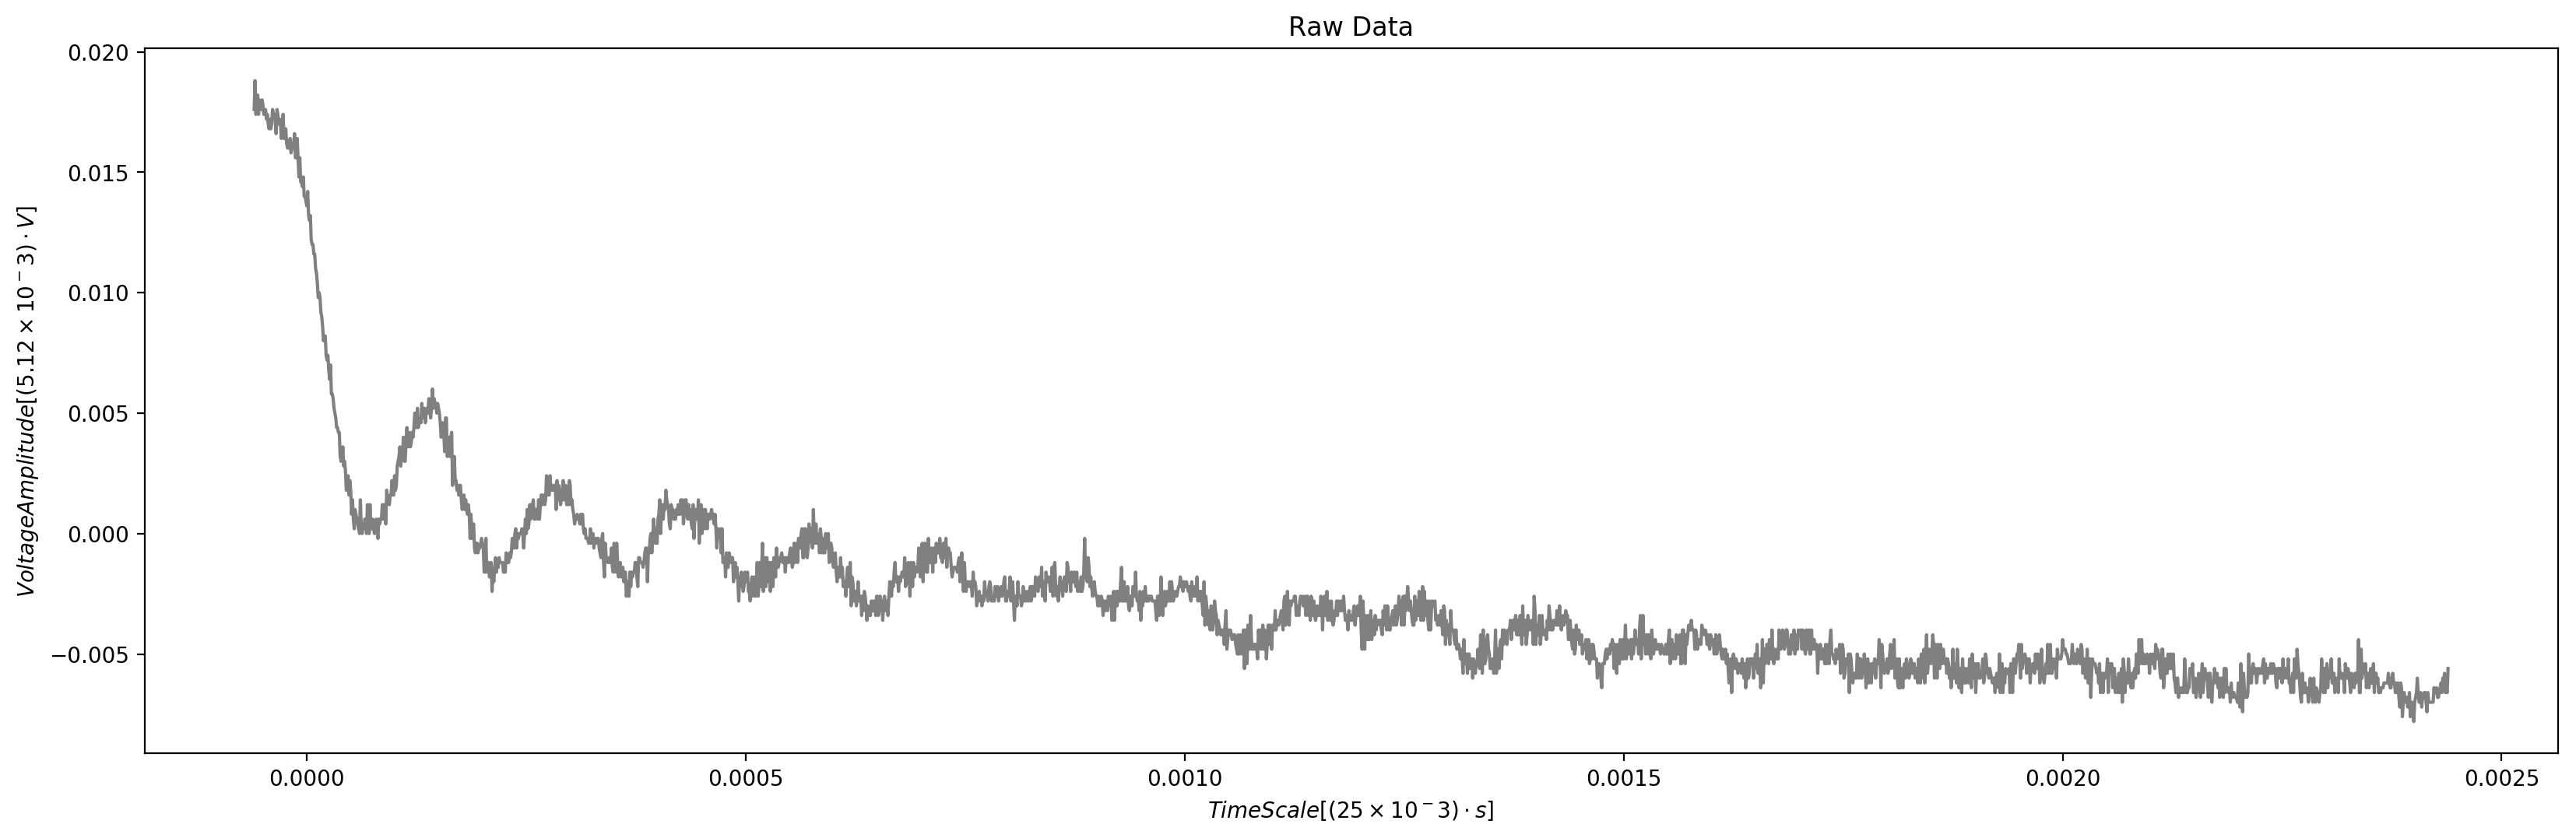

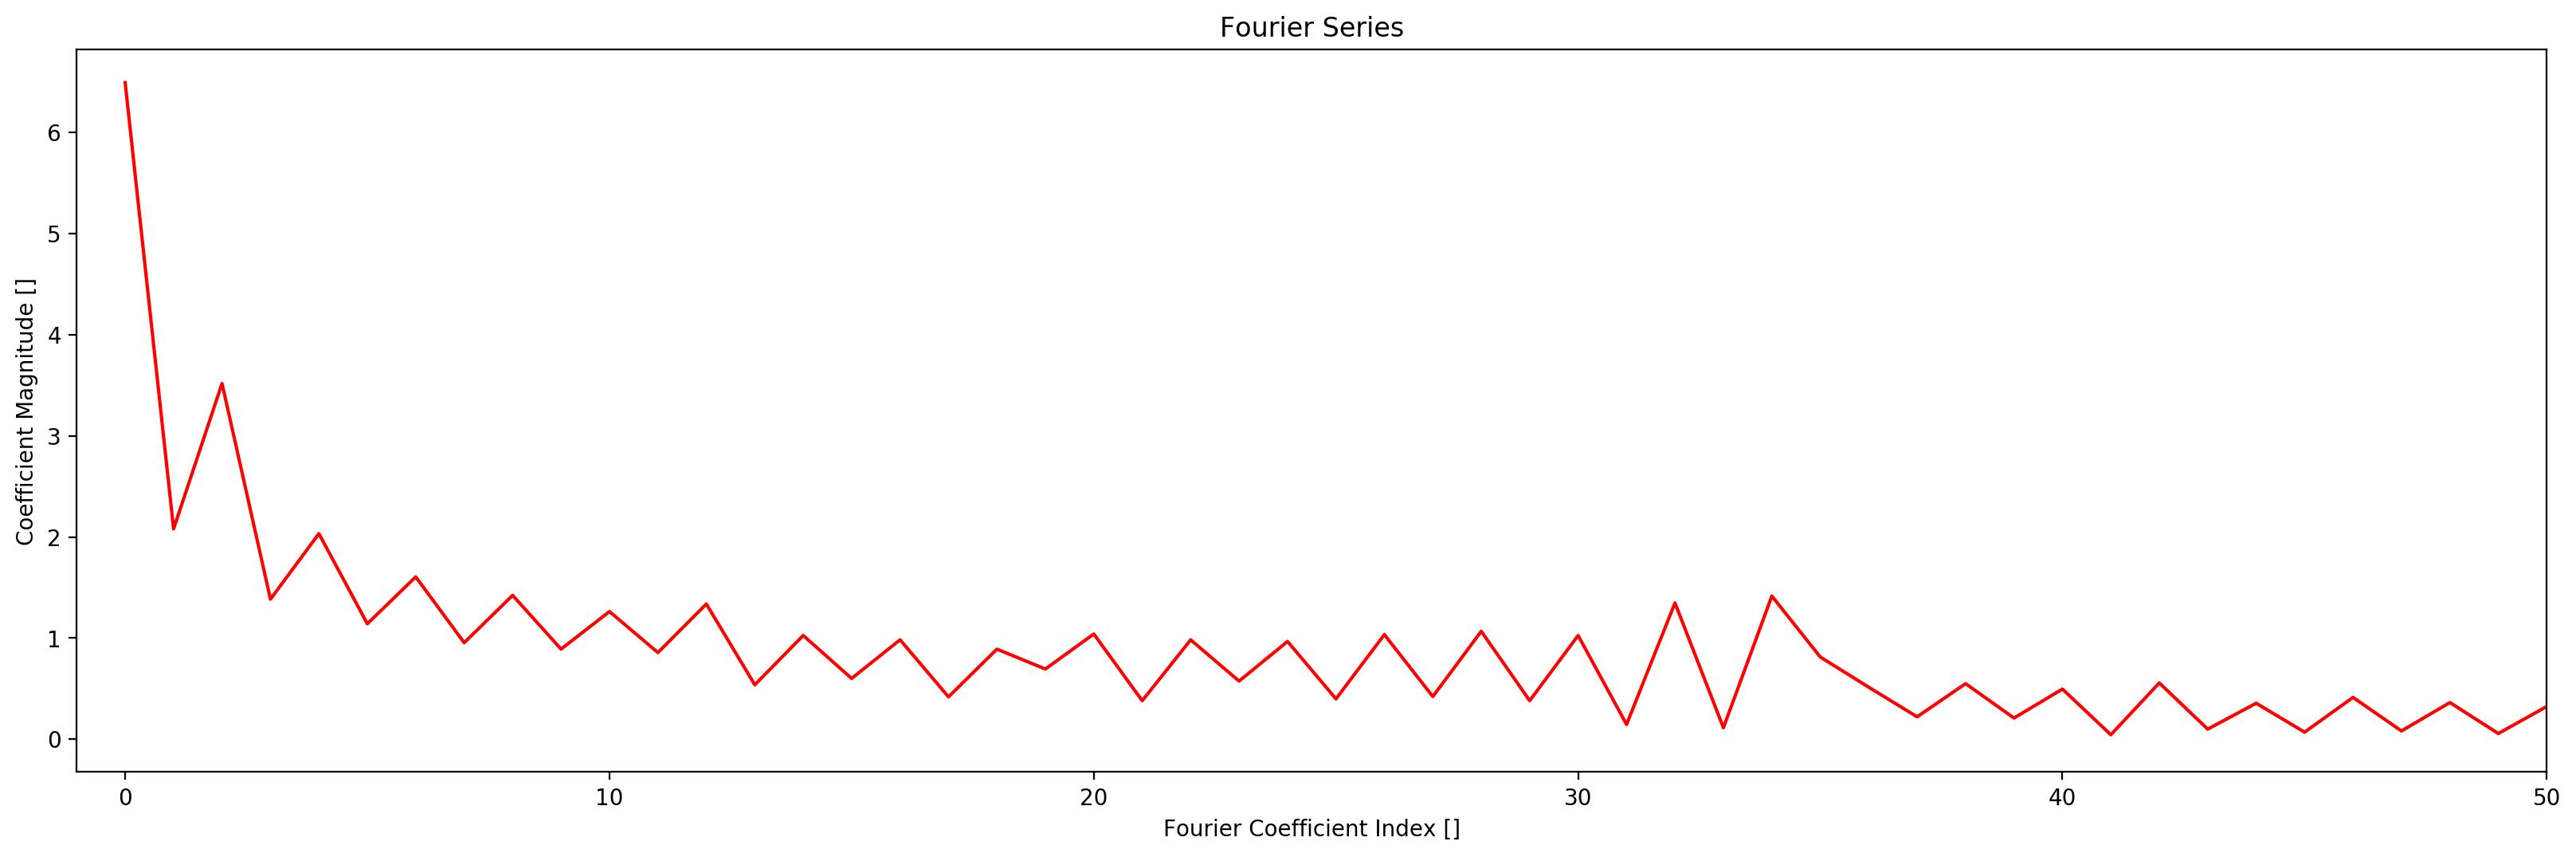

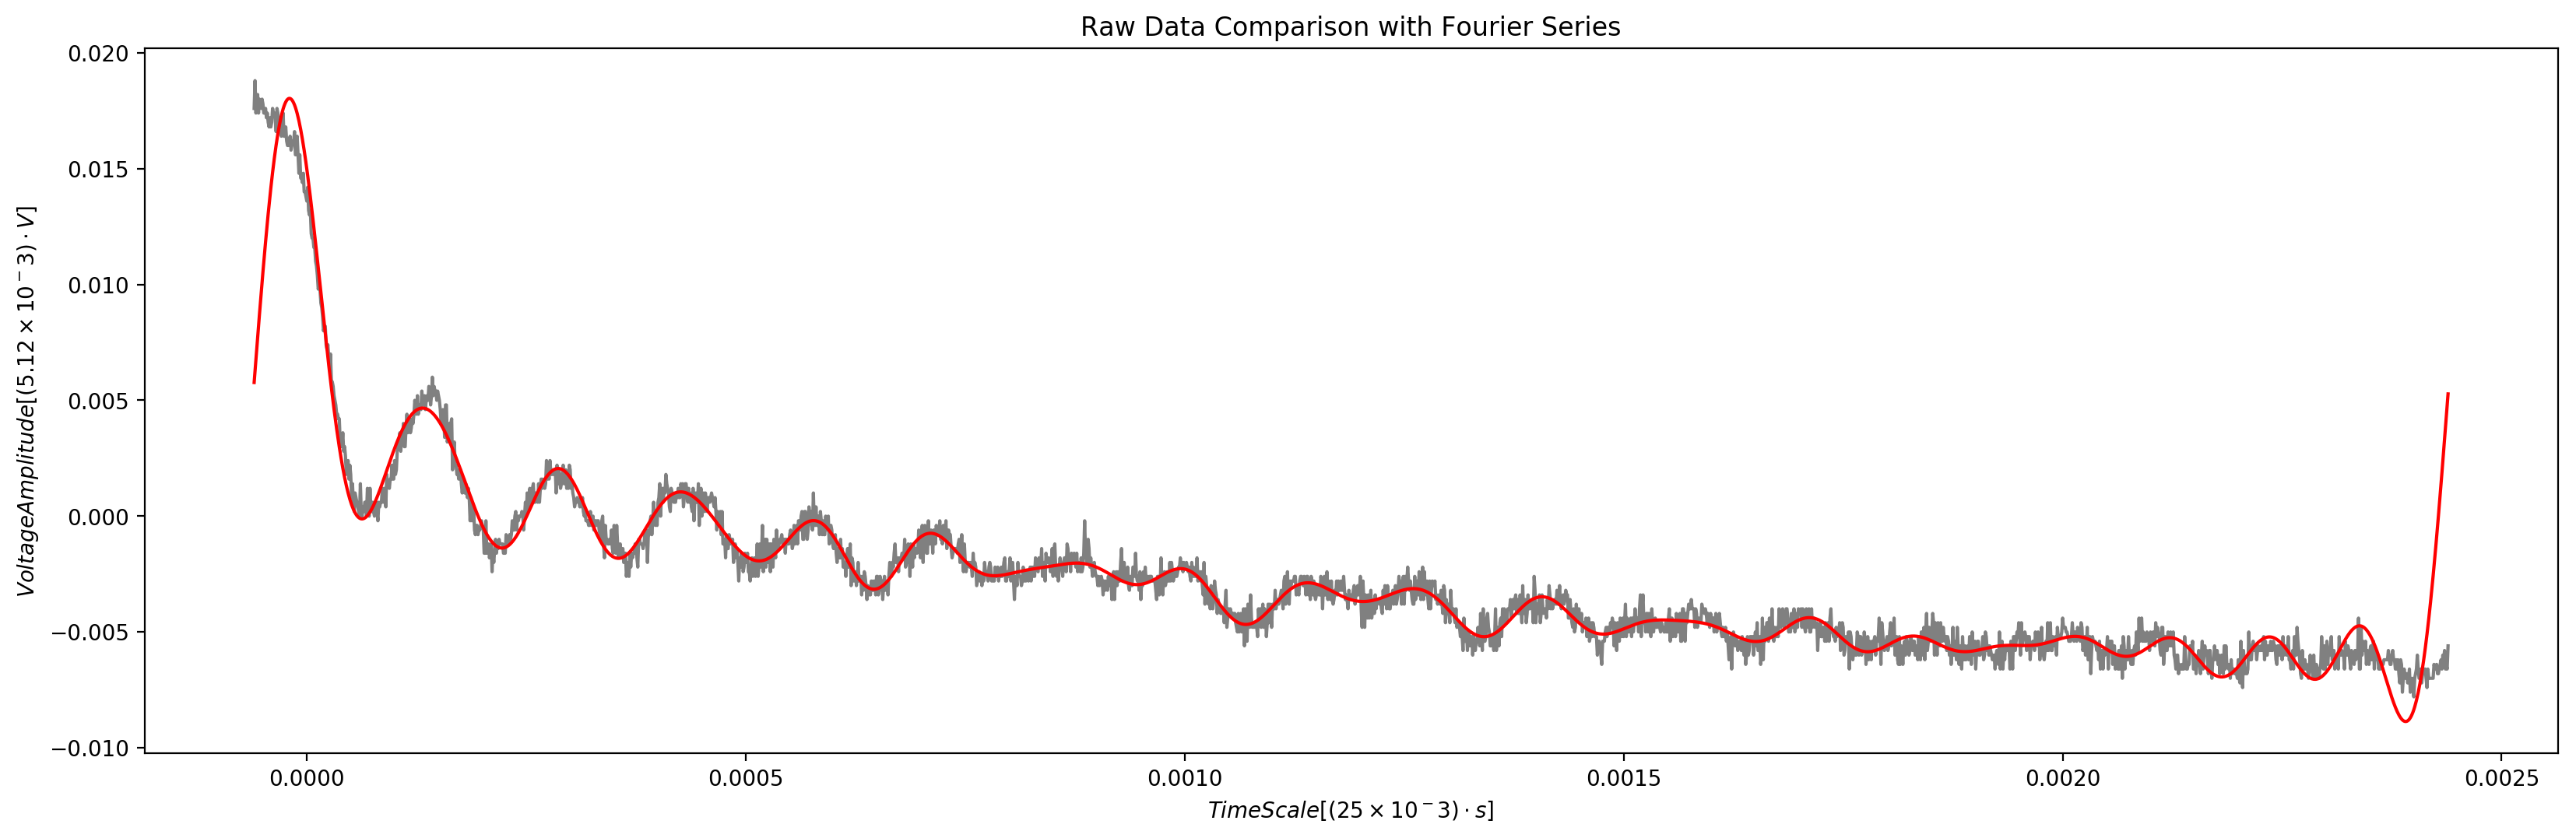

In [4]:
%matplotlib inline
for filepath in files:
    timeScale, voltScale = Load(filepath)
    
    image = plt.figure(num=None, figsize=(20, 6), dpi=200)
    plt.plot(timeScale,voltScale,c = 'gray')
    plt.title("Raw Data")
    plt.xlabel(r'$TimeScale [(25 \times 10^-3) \cdot s]$')
    plt.ylabel(r'$Voltage Amplitude [(5.12 \times 10^-3) \cdot V]$')
    plt.show()
    image.savefig("Rabi\\Raw Data\\" + basename(filepath) +" " 
                  + datetime.datetime.fromtimestamp(time.time())
                  .strftime('%Y-%m-%d %H,%M,%S, ') + ".png")
    
    image = plt.figure(num=None, figsize=(20, 6), dpi=200)
    fourierv = fftpack.rfft(voltScale)
    plt.plot(range(len(fourierv)),abs(fourierv),'r-')
    plt.title("Fourier Series")
    plt.xlabel("Fourier Coefficient Index []")
    plt.ylabel("Coefficient Magnitude []")
    plt.xlim(passfilter)
    plt.show()
    image.savefig("Rabi\\Fourier Series\\" + basename(filepath) +" " 
                  + datetime.datetime.fromtimestamp(time.time())
                  .strftime('%Y-%m-%d %H,%M,%S, ') + ".png")
    
    image = plt.figure(num=None, figsize=(20, 6), dpi=200)
    plt.plot(timeScale,voltScale,c = 'gray')
    fourierv = fftpack.irfft(
        FrequencyPass(fourierv,passfilter[0],passfilter[1]))
    plt.plot(timeScale, fourierv, 'r-')
    plt.title("Raw Data Comparison with Fourier Series")
    plt.xlabel(r'$TimeScale [(25 \times 10^-3) \cdot s]$')
    plt.ylabel(r'$Voltage Amplitude [(5.12 \times 10^-3) \cdot V]$')
    plt.show()
    image.savefig("Rabi\\Comparison\\" + basename(filepath) +" " 
                  + datetime.datetime.fromtimestamp(time.time())
                  .strftime('%Y-%m-%d %H,%M,%S, ') + ".png")

## Frequency Comparison
This is the three dimensional plot of each of the fourier tranforms from the .csv files that sweep through the resonant frequency.

<IPython.core.display.Javascript object>


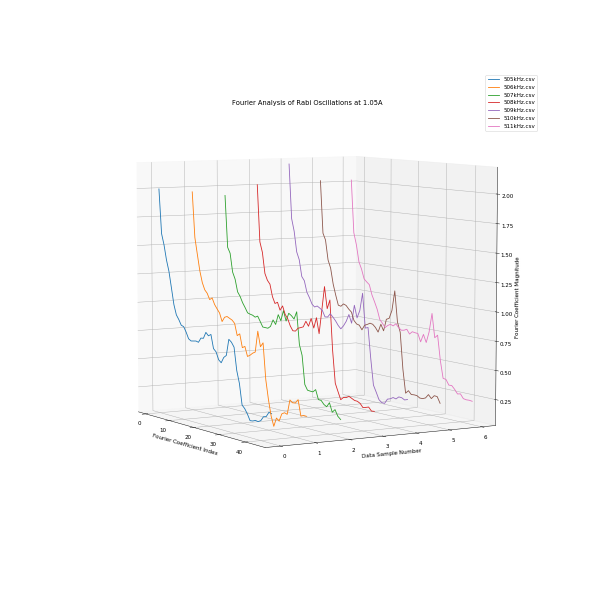

n


In [24]:
%matplotlib notebook
i = 0
fig = plt.figure(num=None, figsize=(15, 15), dpi=40)
ax = plt.axes(projection = '3d')
for filepath in files:
    datafile = open(filepath, 'r');
    datareader = csv.reader(datafile, delimiter=',');
    file = [];
    timeScale = [];
    voltScale = [];
    for row in datareader:
        file.append(row);
        timeScale.append(float(row[3]));
        voltScale.append(float(row[4]));
        
    fourierv = fftpack.rfft(voltScale)
    fourierv = FrequencyPass(fourierv,passfilter[0],passfilter[1])
    fourierv = [abs(i) for i in fourierv]
    fourierv = fourierv[abs(passfilter[0]):abs(passfilter[1])]
    fourierv = MovingAverage(fourierv,4)
    ax.plot3D(range(len(fourierv)), [i]*len(fourierv), fourierv,
              label = basename(filepath))
    i += 1

ax.set_title("Fourier Analysis of Rabi Oscillations at 1.05A")
ax.set_xlabel("Fourier Coefficient Index")
ax.set_ylabel("Data Sample Number")
ax.set_zlabel("Fourier Coefficient Magnitude")
plt.legend()
ax.view_init(elev=60., azim=270.)
plt.show()
save = input()
if save != "n":
    fig.savefig("Rabi\\3D Plot\\" + save + " " 
                + datetime.datetime.fromtimestamp(time.time())
                .strftime('%Y-%m-%d %H,%M,%S, ') + ".png")

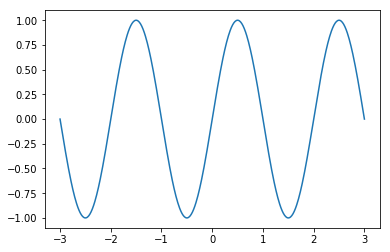

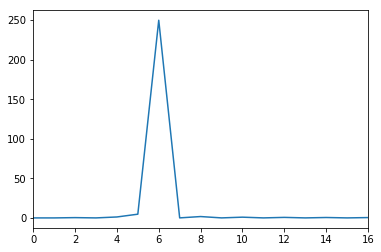

In [71]:
def func(x):
    return sin(1*pi*x)
x = linspace(-3,3,500)
k = func(x)
f = abs(fftpack.rfft(k))
plt.plot(x,k)
plt.show()
plt.plot(range(len(f)),f)
plt.xlim(0,16)
plt.show()

print()